In [1]:
import ROOT
ROOT.gSystem.Load("/home/dhruv/RooUnfold/libRooUnfold")
from ROOT import gRandom, TH1, TH1D, cout


from ROOT import RooUnfoldResponse
from ROOT import RooUnfold
from ROOT import RooUnfoldBayes
from ROOT import RooUnfoldSvd
from ROOT import RooUnfoldTUnfold


from matplotlib import pyplot as plt
ROOT.gStyle.SetOptStat('')
from AtlasCommonUtils import SetAtlasStyle
from Legend import Legend
from ROOT import TLatex
from array import array

ROOT.gStyle.SetPalette(ROOT.kViridis);


import numpy as np


Welcome to JupyROOT 6.16/00


/home/dhruv/alice/sw/ubuntu1604_x86-64/ROOT/v6-16-00-1/lib/ROOT.py:579: UserWarning: "from ROOT import *" is not supported under IPython
  warnings.warn( '"from ROOT import *" is not supported under IPython' )


### Get Data and MC files

In [2]:
#MCfile_name = '/home/dhruv/17l4_16_9bins_1GeV20GeV_200Mevents_lowptEta.root'#general purpose MC
#MCfile_name = '/home/dhruv/18g7a_16_9bins_1GeV20GeV_1Mevents_hitsITS.root'#pp dijet
#MCfile_name = '/home/dhruv/17l3_16_9bins_1GeV20GeV_100Kevents_hitsITS.root'
#MCfile_name = '/home/dhruv/17l3b_16_9bins_1GeV20GeV_100Kevents_hitsITS.root'
#MCfile_name = '/home/dhruv/16k5a_16_9bins_1GeV20GeV_100Kevents_hitsITS.root'
#MCfile_name = '/home/dhruv/17l3b_16_10bins_halfGeV20GeV_1Mevents.root'
#MCfile_name = '/home/dhruv/16k5a_16_37bins_publishedBinning20GeV_1Mevents_noNormalize_allReco.root'
MCfile_name = '/home/dhruv/17l3b_16_37bins_publishedBinning20GeV_1Mevents_noNormalize_allReco.root'



#Datafile_name = '/home/dhruv/fout_16_17p_new_halfGeV20GeV_tracking.root'
#Datafile_name = '/home/dhruv/fout_16_17p_new_ppTracking.root'
#Datafile_name = '/home/dhruv/fout_16_17p_new_1GeV20GeV_tracking_addedPileUp.root'
#Datafile_name = '/home/dhruv/fout_16_37bins_17p_3run_sameTrig_publishedBinning20GeV_tracking_addedPileUp_kINT7_removeNtrack_100Kevents_normalizeByEventOnly.root'
Datafile_name = '/home/dhruv/fout_16_37bins_15n_1run_pppublishedBinning_tracking_kINT7_1MKevents_normalizeByEventOnly.root'


MCfile = ROOT.TFile(MCfile_name)
Datafile = ROOT.TFile(Datafile_name)

filedata = ROOT.TFile('/home/dhruv/HEPData_20GeV.root','READ')
published_data = filedata.Get('hTrack_HEP')

# pp and pPb Comparison

In [114]:
MCfile_name_pp = '/home/dhruv/17l3b_16_10bins_halfGeV20GeV_1Mevents.root'

Datafile_name_pp = '/home/dhruv/fout_16_17p_new_halfGeV20GeV_tracking.root'

MCfile_pp = ROOT.TFile(MCfile_name_pp)
Datafile_pp = ROOT.TFile(Datafile_name_pp)

#MCfile_name_pA = '/home/dhruv/13b2_16_25bins_0GeV20GeV_1Mevents_lowptEta.root'
#MCfile_name_pA = '/home/dhruv/13b2_16_21bins_1GeV30GeV_4L_Allevents.root'#used for analysis note
#MCfile_name_pA = '/home/dhruv/13b2_16_9bins_1GeV20GeV_100Kevents_hitsITS.root'
#MCfile_name_pA = '/home/dhruv/13b2_16_9bins_1GeV20GeV_1Mevents_hitsITS.root'
MCfile_name_pA = '/home/dhruv/13b2_16_10bins_halfGeV20GeV_1Mevents.root'

#Datafile_name_pA = '/home/dhruv/fout_16_13b_3run_pPb_1GeV30GeV_trig_pileup_4lL.root'
#Datafile_name_pA = '/home/dhruv/fout_16_13b_ppTracking.root'
Datafile_name_pA = '/home/dhruv/fout_16_13b_halfGeV20GeV_tracking.root'


MCfile_pA = ROOT.TFile(MCfile_name_pA)
Datafile_pA = ROOT.TFile(Datafile_name_pA)

### Get response Matrix and plot it, also true/reco ratio

<ROOT.TH2F object ("hCorrelation_cor") at 0x660a290>
<ROOT.TH1D object ("hCorrelation_cor_px") at 0x61fe020>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


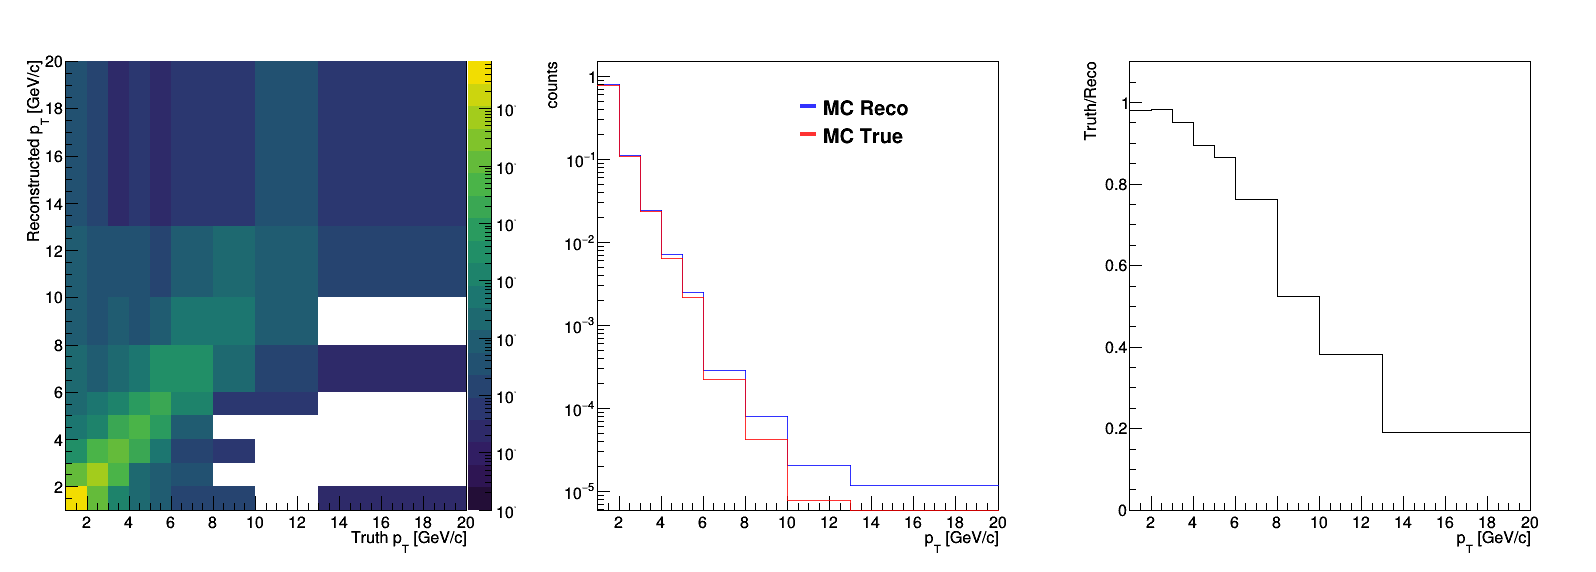

In [119]:
responseMatrix = MCfile.Get("hCorrelation_cor");
print responseMatrix
#responseMatrix.Rebin2D(2,2)
responseMatrix.ClearUnderflowAndOverflow()
responseMatrix.SetTitle(';Truth p_{T} [GeV/c];Reconstructed p_{T} [GeV/c]')
#responseMatrix.SetMinimum(1e-7)
        
#print responseMatrix.GetBinError(5,6)
mc_truth = responseMatrix.ProjectionX()
mc_reco = responseMatrix.ProjectionY()

print mc_truth

for i in range(mc_truth.GetNbinsX()):
    binWidth = mc_truth.GetBinWidth(i)
    binCon_truth = mc_truth.GetBinContent(i)
    binCon_reco = mc_reco.GetBinContent(i)
    mc_truth.SetBinContent(i, binCon_truth/binWidth)
    mc_reco.SetBinContent(i, binCon_reco/binWidth)
    binCon_truth_error = mc_truth.GetBinError(i)
    binCon_reco_error = mc_reco.GetBinError(i)
    mc_truth.SetBinError(i, binCon_truth_error/binWidth)
    mc_reco.SetBinError(i, binCon_reco_error/binWidth)
    #print binCon_truth_error
#mc_truth.Sumw2()
#mc_reco.Sumw2()
mc_truth.SetLineColorAlpha(2,0.8)
mc_reco.SetLineColorAlpha(4,0.8)

##draw mc truth, mc reco, response matrix
c = ROOT.TCanvas('c','c',1600,600)
c.Divide(3)
c.cd(1)
responseMatrix.SetMinimum(1e-8)
responseMatrix.GetXaxis().SetRangeUser(1,20)
responseMatrix.GetYaxis().SetRangeUser(1,20)
responseMatrix.Draw('colz')
ROOT.gPad.SetLogz()

c.cd(2)
label = Legend("")
label.Add(mc_reco,'MC Reco','L')
label.Add(mc_truth,'MC True','L')
mc_reco.GetXaxis().SetRangeUser(1,20)
mc_truth.GetXaxis().SetRangeUser(1,20)
#hs_mc = ROOT.THStack()
#hs_mc.Add(mc_reco)
#hs_mc.Add(mc_truth)
#hs_mc.Draw('nostacke')
mc_reco.SetTitle('; p_{T} [GeV/c]; counts')
mc_reco.Draw('histe')
mc_truth.SetTitle('; p_{T} [GeV/c]; counts')
mc_truth.Draw('histesame')
label.Draw(0.5,.87)
ROOT.gPad.SetLogy()

c.cd(3)
ratio_mc = mc_truth.Clone()
ratio_mc.SetMinimum(0.0)
ratio_mc.SetMaximum(1.1)
ratio_mc.SetLineColor(1)
ratio_mc.SetMarkerStyle(5)
ratio_mc.GetXaxis().SetRangeUser(1,20)
ratio_mc.Divide(mc_reco)
ratio_mc.Draw('histe')
ratio_mc.SetTitle(' ; p_{T} [GeV/c]; Truth/Reco')
c.Update()
c.Draw()

#c.SaveAs('Matrix_tracking_its_pp_17l3b_wNeutrals.png')
#c.SaveAs('reWeighted_response_pp.png')

# Data Spectrum

3.44690183598
1.65753343366


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


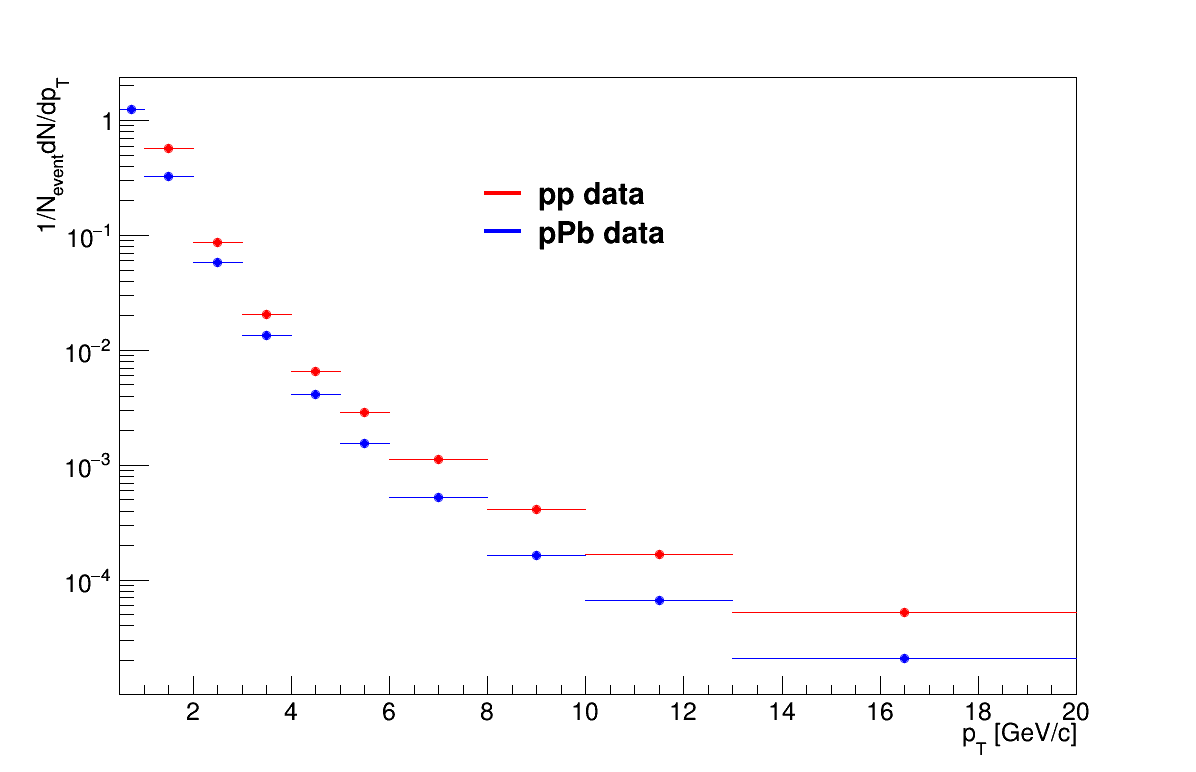

In [115]:
data_pp = Datafile_pp.Get('hReco').Clone()
data_pp.ClearUnderflowAndOverflow()
data_pp.GetYaxis().SetRangeUser(1e-5,5)
data_pp.SetLineColor(2)
data_pp.SetMarkerColor(2)
data_pp.SetMarkerStyle(20)
data_pp.SetTitle(';p_{T} [GeV/c];1/N_{event}dN/dp_{T}')
#data_pp.Scale(1/data_pp.Integral())

data_pA = Datafile_pA.Get('hReco').Clone()
data_pA.ClearUnderflowAndOverflow()
data_pA.GetYaxis().SetRangeUser(1e-5,5)
data_pA.SetMinimum(1e-5)
data_pA.SetLineColor(4)
data_pA.SetMarkerColor(4)
data_pA.SetMarkerStyle(20)
data_pA.SetTitle(';p_{T} [GeV/c];1/N_{event}dN/dp_{T}')
data_pA.Scale(1.0/7.0)


print data_pp.Integral()
print data_pA.Integral()


c = ROOT.TCanvas('c','c',1200,800)

data_pA.Draw('e')
data_pp.Draw('esame')
c.SetLogy()

label = Legend("")
label.Add(data_pp, 'pp data','L')
label.Add(data_pA, 'pPb data','L')
label.Draw(.4, .8)

c.Draw()
#c.SaveAs('dataSpectrum_tracking_compare_sameBinning.png')
#c.SaveAs('dataSpectrum_tracking_pPb-pp_sameBinning.pdf')

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


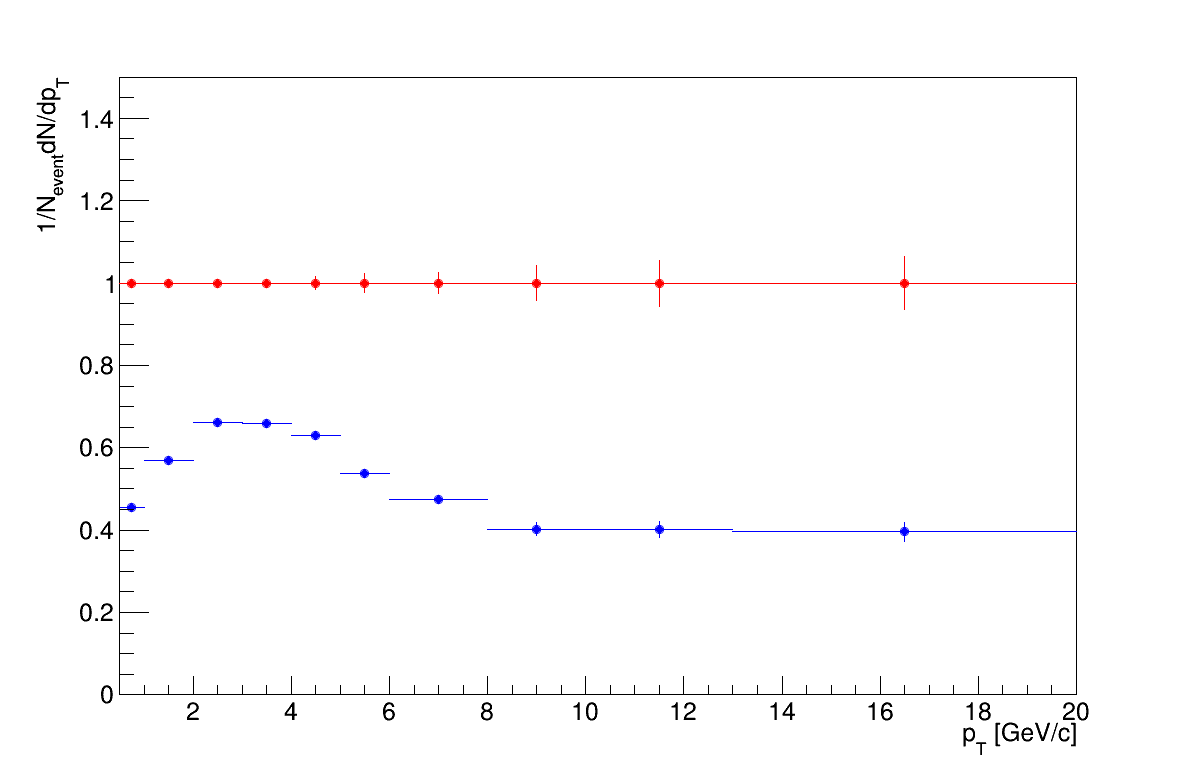

In [116]:
ratio_pAp_measured = data_pA.Clone()
ratio_pAp_measured.Divide(data_pp)
ratio_pAp_measured.GetYaxis().SetRangeUser(0,1.5)

ratio_unity = data_pp.Clone()
ratio_unity.Divide(data_pp)

c= ROOT.TCanvas('c','c',1200,800)
ratio_pAp_measured.Draw('e')
ratio_unity.Draw('same')
c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


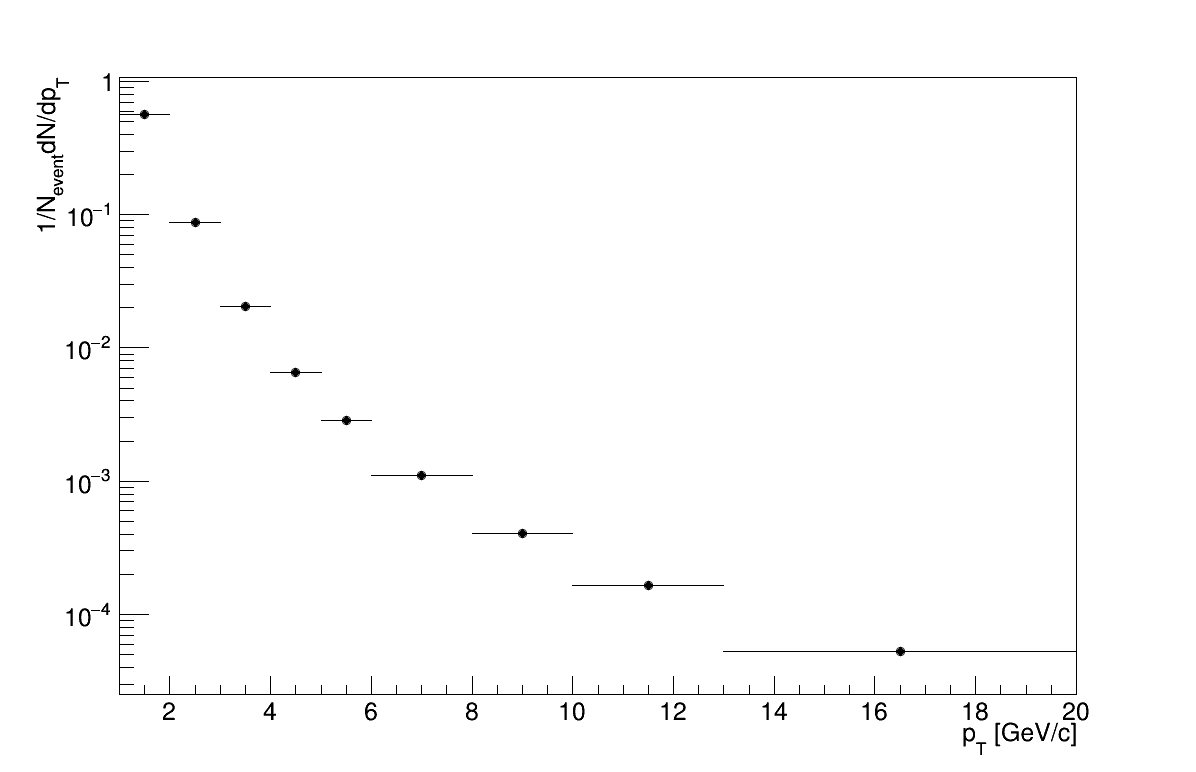

In [120]:
data = Datafile.Get('hReco').Clone()
data.ClearUnderflowAndOverflow()
data.SetLineColor(ROOT.kBlack)
data.SetMarkerColor(ROOT.kBlack)
data.SetMarkerStyle(20)
data.SetTitle(';p_{T} [GeV/c];1/N_{event}dN/dp_{T}')
numEvents = 659038#747090.0 #pp events
max_eta = 1.6
#data.Scale(1/(numEvents*max_eta))
c = ROOT.TCanvas('c','c',1200,800)
data.Draw('e')
ROOT.gPad.SetLogy()
c.Draw()
#c.SaveAs('dataSpectrum_tracking_pp.png')

### Get and plot efficiency and fake rate


****************************************
Minimizer is Linear
Chi2                      =      9.54583
NDf                       =            8
p0                        =     0.852846   +/-   0.00139084  


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


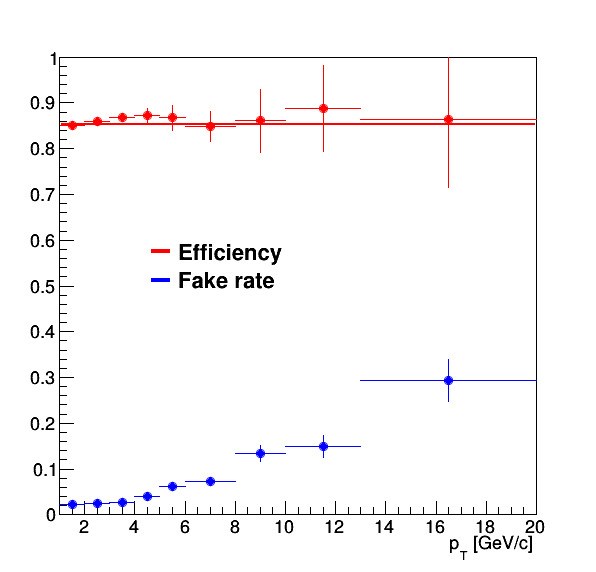

In [121]:
#Get efficiency and fake rate
efficiency = MCfile.Get("hRecoTruth").Clone()#MCfile.Get("Efficiency")
efficiency.Divide(MCfile.Get("hTruth"))
fakerate   = MCfile.Get("FakeRate")

#Plot efficiency and fake rate
efficiency.SetTitle(' ; p_{T} [GeV/c];')
efficiency.SetMinimum(0.0)
efficiency.SetMaximum(1.)
efficiency.SetMarkerStyle(20)
efficiency.SetMarkerColor(2)
efficiency.SetLineColor(2)
efficiency.GetXaxis().SetRangeUser(1,20)
fakerate.SetMarkerStyle(20)
fakerate.SetLineColor(4)
fakerate.SetMarkerColor(4)

c = ROOT.TCanvas('c','c',600,600)
efficiency.Fit('pol0', '', '', 1,20)
efficiency.Draw()
fakerate.Draw('same')

#label = Legend("MC: 13b2_efix_p1")
label = Legend("")
label.Add(efficiency,'Efficiency','L')
label.Add(fakerate,'Fake rate','L')
label.Draw(.25,.61)
c.Draw()
#c.SaveAs('EfficiencyAndFakeRate_tracking_pp_17l3b_wNeutrals.png')
#c.SaveAs('EfficiencyAndFakeRate_tracking_its_dijet.png')


#for i in range(efficiency.GetNbinsX()):
#    low = efficiency.GetBinLowEdge(i)
#    center =   efficiency.GetBinCenter(i)
#    high = efficiency.GetBinLowEdge(i+1)
#    content =  efficiency.GetBinContent(i)
#    print low, '\t', center, '\t', high, '\t',content
    
#for i in range(fakerate.GetNbinsX()+1):
#    low = fakerate.GetBinLowEdge(i)
#    center =   fakerate.GetBinCenter(i)
#    high = fakerate.GetBinLowEdge(i+1)
#    content =  fakerate.GetBinContent(i)
#    print low, '\t', center, '\t', high, '\t',content

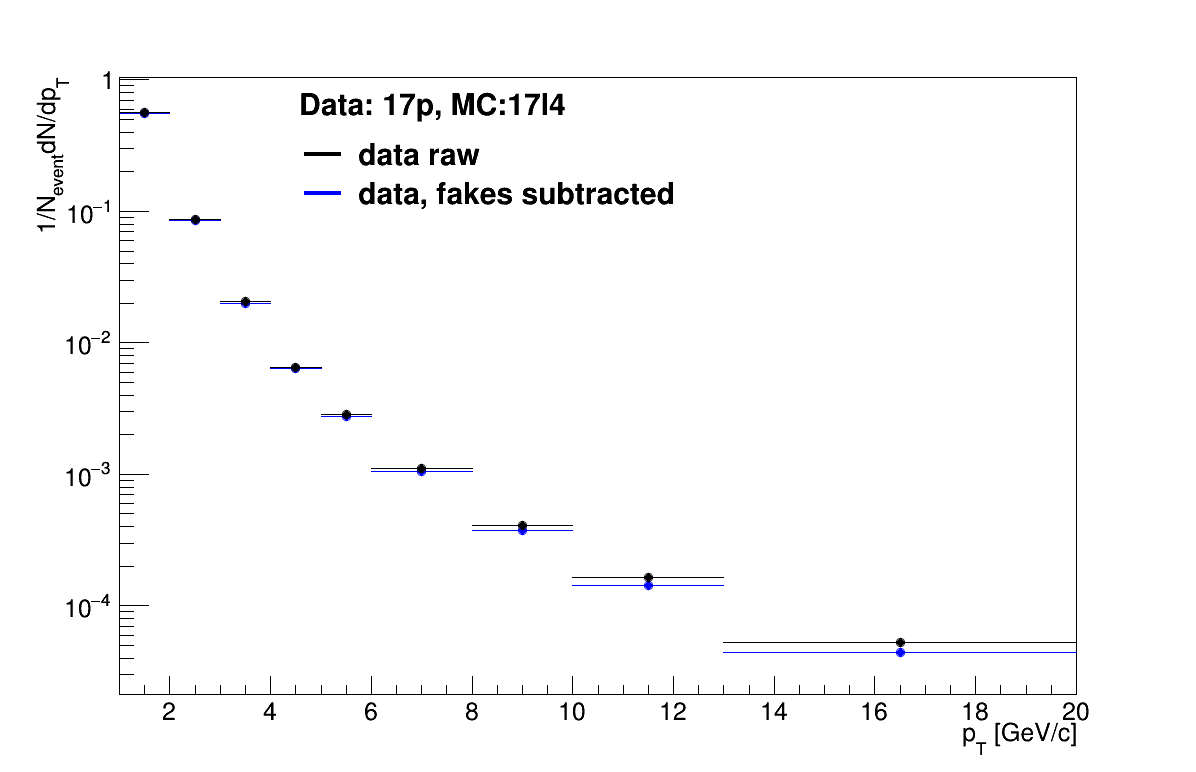

In [123]:
data_bkgsub = data.Clone()
for i in range(1,fakerate.GetNbinsX()+1):
    bkg = data.GetBinContent(i)*fakerate.GetBinContent(i)
    data_bkgsub.SetBinContent(i,data.GetBinContent(i)-bkg)

c.Clear()
data.GetXaxis().SetRangeUser(1,20)
data_bkgsub.SetLineColor(ROOT.kBlue)
data_bkgsub.SetMarkerColor(ROOT.kBlue)
data_bkgsub.SetMarkerStyle(20)

data_bkgsub.Draw('e')
data.Draw('esame')

ROOT.gPad.SetLogy()
label = Legend("Data: 17p, MC:17l4")
label.Add(data,'data raw','L')
label.Add(data_bkgsub,'data, fakes subtracted','L')
label.Draw(.25,.85)
c.Draw()
#c.SaveAs('FakeRate_sub_tracking_its_1GeV20GeV.png')


### DEFINE DATA FOR UNFOLDING 

In [72]:
data_inputforunfolding = data_bkgsub.Clone()
#data_inputforunfolding = data.Clone()

Warning in <TFile::Append>: Replacing existing TH1: binned_data (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


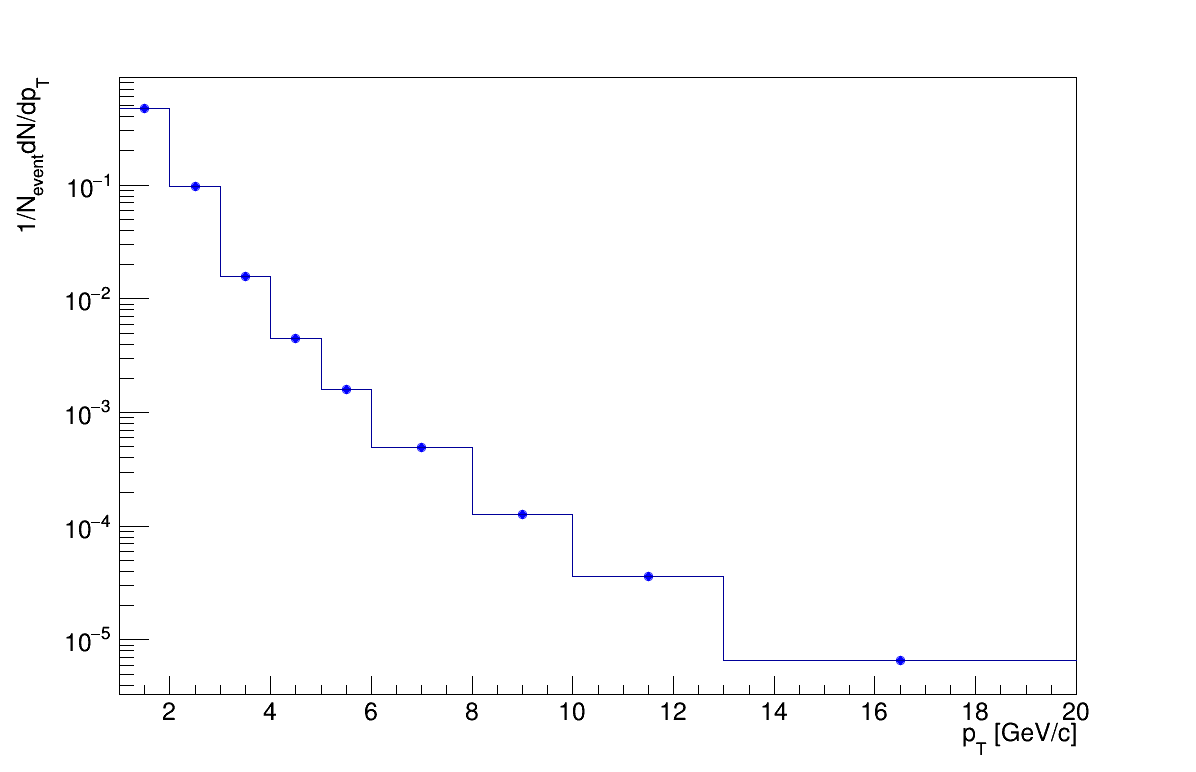

In [124]:
#pp
nbinstrack = 9
track_bins = np.array([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 8.0, 10.0, 13.0, 20.0], dtype='float64')
published_content = np.array([4.70E-01, 9.80E-02, 1.58E-02, 4.52E-03, 1.59E-03, 
                              4.90E-04, 1.27E-04, 3.64E-05, 6.66E-06], dtype='float64')
published_error = np.array([1.41E-04, 6.16E-05, 1.73E-05, 5.26E-06, 3.08E-06, 
                            1.20E-06, 6.04E-07, 2.63E-07, 7.34E-08], dtype='float64')

#nbinstrack = 10
#track_bins = np.array([0.5, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 8.0, 10.0, 13.0, 20.0], dtype='float64')
#published_content = np.array([1.11E+00, 4.70E-01, 9.80E-02, 1.58E-02, 4.52E-03, 1.59E-03, 
#                              9.80E-04, 2.53E-04, 1.09E-04, 4.66E-05], dtype='float64')
#published_error = np.array([2.69E-04, 1.41E-04, 6.16E-05, 1.73E-05, 5.26E-06, 3.08E-06, 
#                            2.39E-06, 1.21E-06, 7.89E-07, 5.13E-07], dtype='float64')


h = ROOT.TH1F('binned_data','', nbinstrack, track_bins)
for i in range(nbinstrack):
    h.SetBinContent(i+1, published_content[i])
    h.SetBinError(i+1, published_error[i])

h.SetTitle(';p_{T} [GeV/c];1/N_{event}dN/dp_{T}')
h.SetMarkerStyle(20)
h.SetMarkerColor(ROOT.kBlue)


c= ROOT.TCanvas('c','c',1200,800)
h.Draw('histe')
c.SetLogy()
c.Draw()

Warning in <TFile::Append>: Replacing existing TH1: binned_data_pPb (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: binned_data_pPb (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


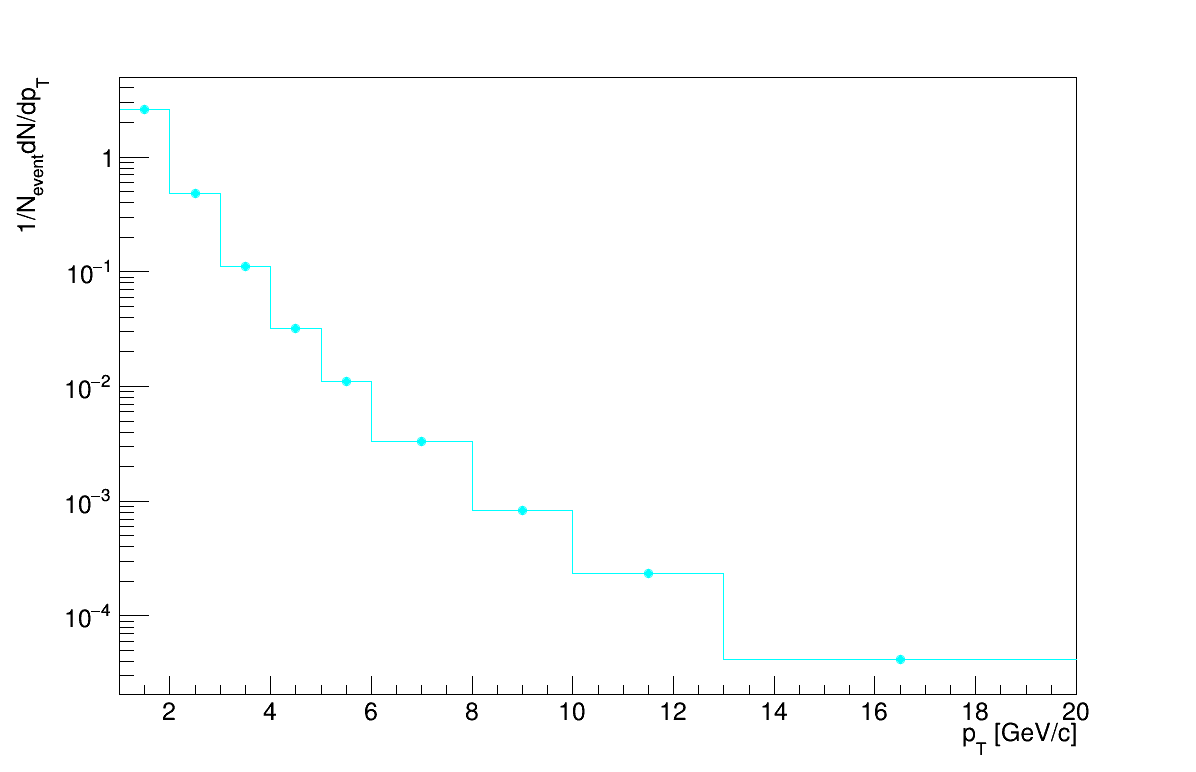

In [103]:
#pPb
nbinstrack_pA = 9
track_bins_pA = np.array([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 8.0, 10.0, 13.0, 20.0], dtype='float64')
published_content_pA = np.array([2.62E+00, 4.85E-01, 1.11E-01, 3.19E-02, 1.10E-02, 
                                 3.30E-03, 8.25E-04, 2.34E-04, 4.16E-05], dtype='float64')
published_error_pA = np.array([4.87E-04, 1.45E-04, 6.84E-05, 2.30E-05, 1.34E-05,
                            6.32E-06, 2.52E-06, 1.33E-06, 4.72E-07], dtype='float64')


h_pA = ROOT.TH1F('binned_data_pPb','', nbinstrack_pA, track_bins_pA)
for i in range(nbinstrack):
    h_pA.SetBinContent(i+1, published_content_pA[i])
    h_pA.SetBinError(i+1, published_error_pA[i])
    

h_pA.SetTitle(';p_{T} [GeV/c];1/N_{event}dN/dp_{T}')
h_pA.SetMarkerStyle(20)
h_pA.SetMarkerColor(7)
h_pA.SetLineColor(7)

c= ROOT.TCanvas('c','c',1200,800)
h_pA.Draw('histe')
c.SetLogy()
c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file data_published_spectra.png has been created


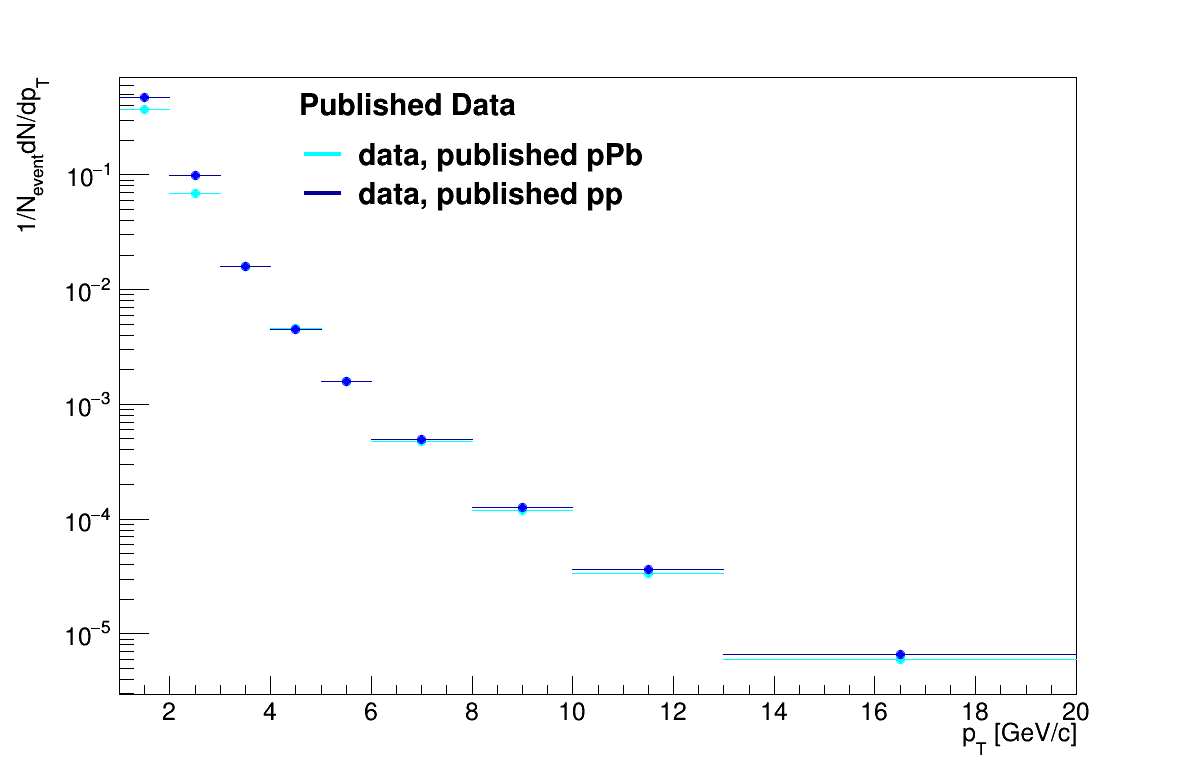

In [104]:
h_pA.Scale(1.0/7.0)
c= ROOT.TCanvas('c','c',1200,800)
h_pA.Draw('e')
h.Draw('esame')

label = Legend("Published Data")
label.Add(h_pA,'data, published pPb','L')
label.Add(h,'data, published pp','L')
label.Draw(.25,.85)

c.SetLogy()
c.Draw()
c.SaveAs('data_published_spectra.png')

### Published Data 

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


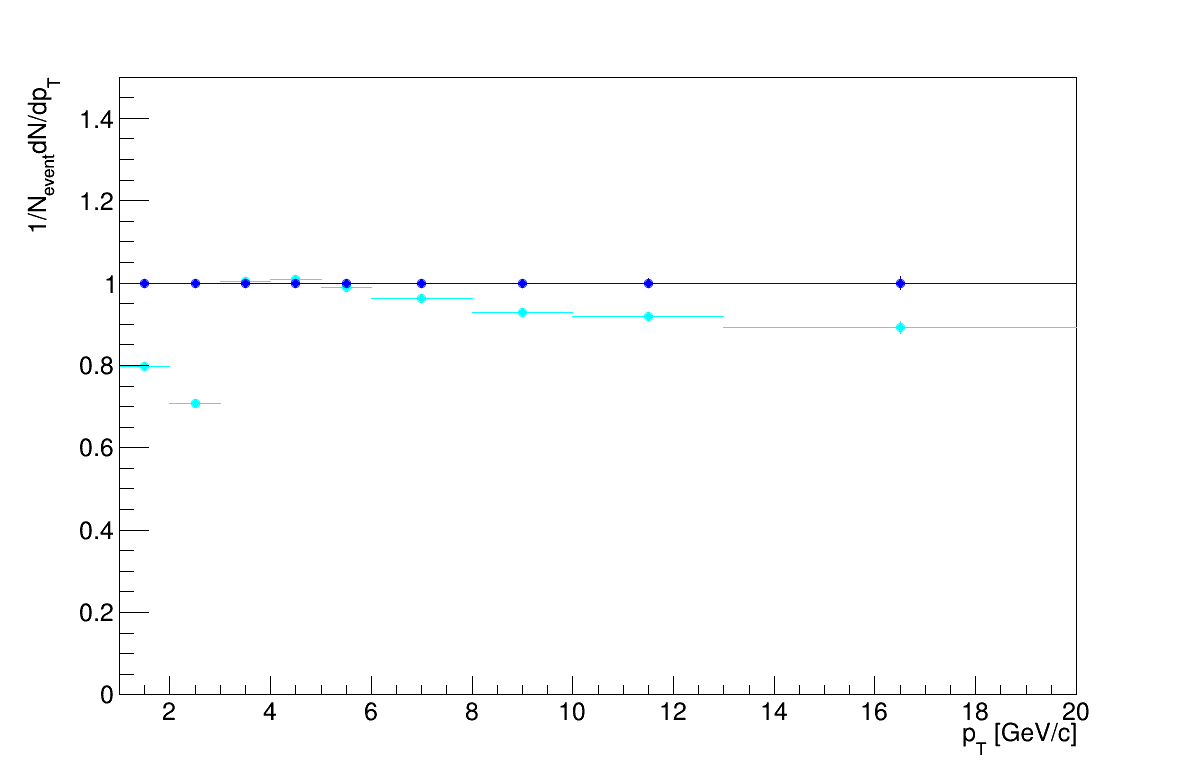

In [106]:
ratio_pAp_published = h_pA.Clone()
ratio_pAp_published.Divide(h)
ratio_pAp_published.GetYaxis().SetRangeUser(0,1.5)

ratio_unity = h.Clone()
ratio_unity.Divide(h)

c= ROOT.TCanvas('c','c',1200,800)
ratio_pAp_published.Draw('e')
ratio_unity.Draw('same')
c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


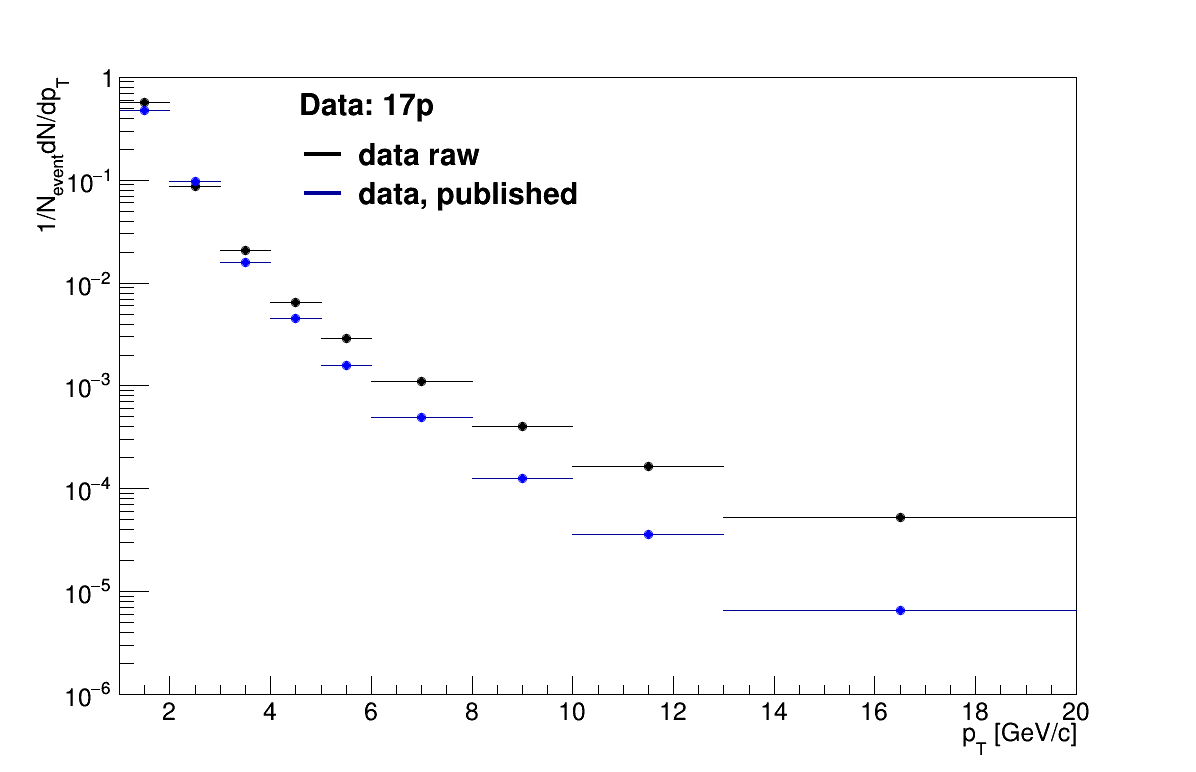

In [82]:
data.GetYaxis().SetRangeUser(1e-6,1)
c= ROOT.TCanvas('c','c',1200,800)
data.Draw('e')
h.Draw('esame')

label = Legend("Data: 17p")
label.Add(data,'data raw','L')
label.Add(h,'data, published','L')
label.Draw(.25,.85)

c.SetLogy()
c.Draw()
#c.SaveAs('data_spectra.png')

# Raw to published

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file ratio_rawPublished.png has been created


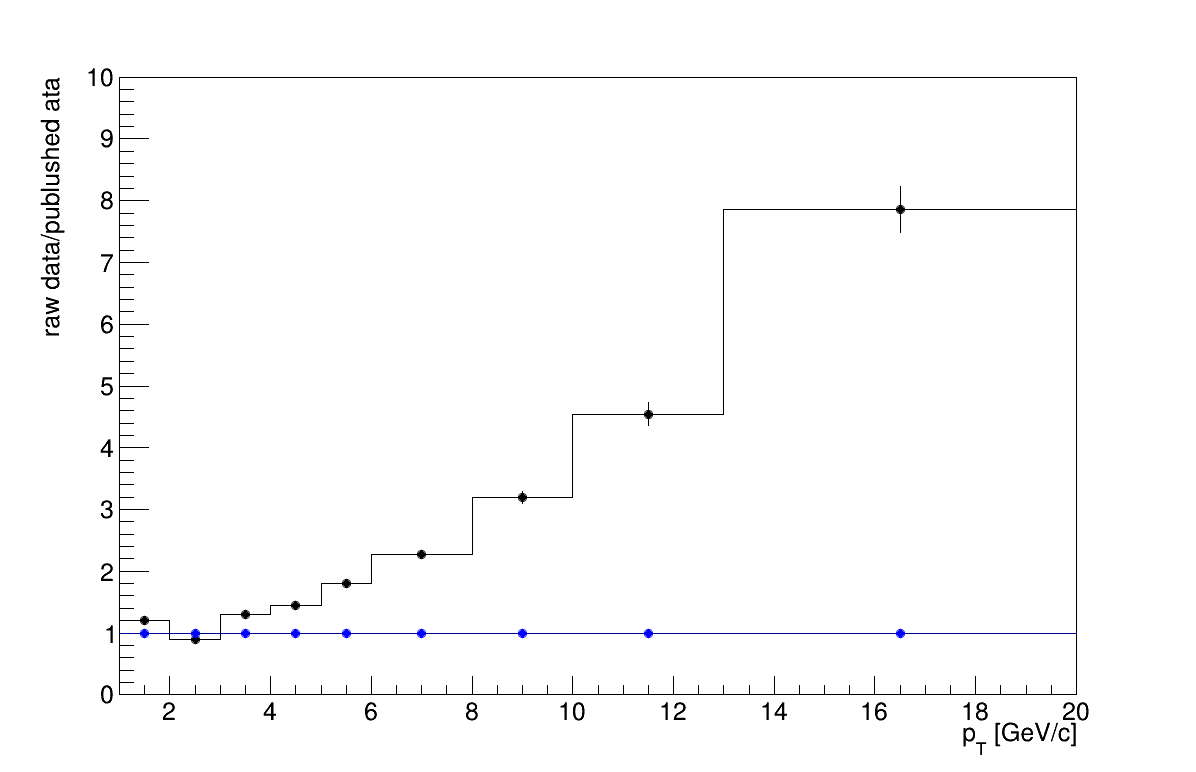

In [51]:
ratio_one = h.Clone()
ratio_one.Divide(h)
ratio_rawPublished = data.Clone()
ratio_rawPublished.Divide(h)

ratio_rawPublished.GetYaxis().SetRangeUser(0,10)

ratio_rawPublished.SetTitle(';p_{T} [GeV/c];raw data/publushed ata')
c= ROOT.TCanvas('c','c',1200,800)
ratio_rawPublished.Draw('histe')
ratio_one.Draw('same')
c.Draw()
c.SaveAs('ratio_rawPublished.png')

# Refolding

In [125]:
##refolding the distribution:
def applyEfficiencyUnCorrection(histo):
    histo_corrected = histo.Clone()
    for i in range(1,histo.GetNbinsX()+1):
        pt = ROOT.Double()
        eff = ROOT.Double()
        #efficiency.GetPoint(i-1,pt,eff)
        #print pt, eff
        eff = efficiency.GetBinContent(i)
        histo_corrected.SetBinContent(i,histo.GetBinContent(i)*eff)
        histo_corrected.SetBinError(i,histo.GetBinError(i)*eff)
    return histo_corrected

#for i in range(responseMatrix.GetNbinsX()):
#    ySliceSum = float(0.0)
#    for j in range(responseMatrix.GetNbinsY()):
#        tempCont = responseMatrix.GetBinContent(i+1, j+1)
#        ySliceSum = ySliceSum + tempCont
    #print "ySliceSum = ", ySliceSum, "bin: ", i+1
#    for j in range (responseMatrix.GetNbinsY()+1):
#        tempCont = responseMatrix.GetBinContent(i+1, j+1)
#        newCont = tempCont/ySliceSum
#        responseMatrix.SetBinContent(i+1, j+1, newCont)
        

# h=published data 
h_wEff = applyEfficiencyUnCorrection(h)
h_wEff.SetLineColor(ROOT.kRed)
N = h_wEff.GetNbinsX()#data_unfolded['SVD8'].GetNbinsX()


data_refolded= h_wEff.Clone()#data_unfolded['SVD9'].Clone()
data_refolded.SetLineColorAlpha(4,0.5)

#ratio_mc.Scale(1/ratio_mc.Integral())
#h_wEff.Scale(1/h_wEff.Integral())

for ireco in range(1,N+1):
    temp = 0
    for itruth in range(1,N+1):
        #print responseMatrix.GetBinContent(itruth,ireco)
        #print data_unfolded['SVD'].GetBinContent(itruth)
        temp += responseMatrix.GetBinContent(itruth,ireco)*h_wEff.GetBinContent(itruth)
    data_refolded.SetBinContent(ireco, temp)

old_int = h_wEff.Integral()
#datarefolded.Divide(ratio_mc)

#for i in range(ratio_mc.GetNbinsX()+1):
#    print h_wEff.GetBinContent(i+1), '\t', ratio_mc.GetBinContent(i+1), '\t', h_wEff.GetBinWidth(i+1)
#    refolded_temp = (h_wEff.GetBinContent(i+1)*ratio_mc.GetBinContent(i+1))
#    data_refolded.SetBinContent(i, refolded_temp)

data_refolded.Scale(old_int/data_refolded.Integral())

#print h.Integral()
print '\n'
print h_wEff.Integral()
print data_refolded.Integral()




0.497589232767
0.497589246722


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


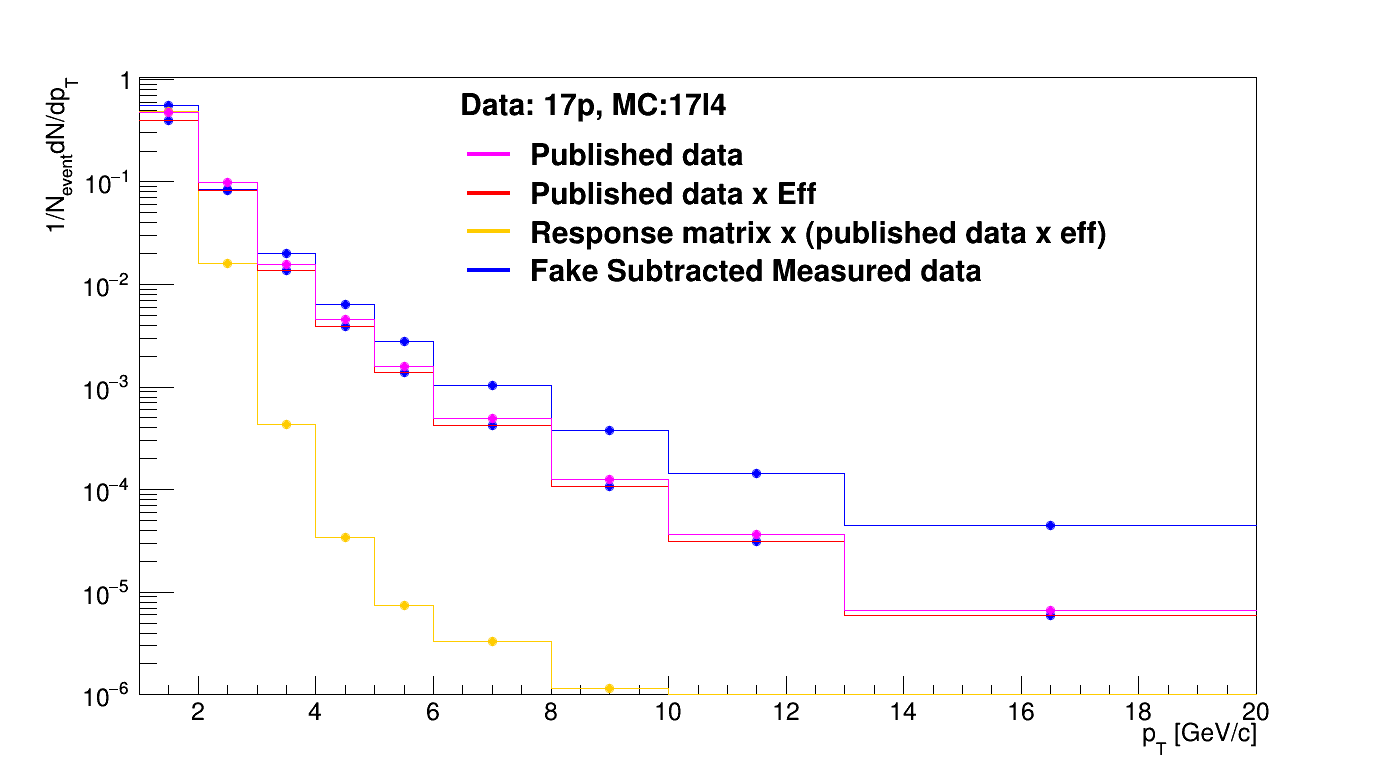

In [126]:
#plotting the refolded results
c= ROOT.TCanvas('c','c',1400,800)
h.SetLineColor(ROOT.kMagenta)
data_bkgsub.SetLineColor(ROOT.kBlue)
data_refolded.SetLineColor(ROOT.kOrange)
h.SetMarkerColor(ROOT.kMagenta)
data_bkgsub.SetMarkerColor(ROOT.kBlue)
data_refolded.SetMarkerColor(ROOT.kOrange)

data_refolded.GetXaxis().SetRangeUser(1,20)
data_refolded.SetTitle(";p_{T} [GeV/c];1/N_{event}dN/dp_{T}")

data_bkgsub.SetMinimum(1e-6)

data_bkgsub.Draw('histe')
data_refolded.Draw('histesame')
h_wEff.Draw('histesame')
h.Draw('histesame')



label = Legend("Data: 17p, MC:17l4")
label.Add(h,'Published data','L')
label.Add(h_wEff,'Published data x Eff','L')
label.Add(data_refolded,'Response matrix x (published data x eff)','L')
label.Add(data_bkgsub,'Fake Subtracted Measured data','L')
label.Draw(.33,.85)

c.SetLogy()
c.Draw()
#c.SaveAs('refolding_pp_its_1GeV20GeV.pdf')
#c.SaveAs('refolding_pp_its_ratioProduct_matrix.png')

In [127]:
ratio_data_bkgsub = data_bkgsub.Clone()
ratio_data_refolded = data_refolded.Clone()
ratio_h_wEff = h_wEff.Clone()
ratio_h = h.Clone()

ratio_data_bkgsub.Divide(ratio_h)
ratio_data_refolded.Divide(ratio_h)
ratio_h_wEff.Divide(ratio_h)
ratio_h.Divide(ratio_h)

True

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


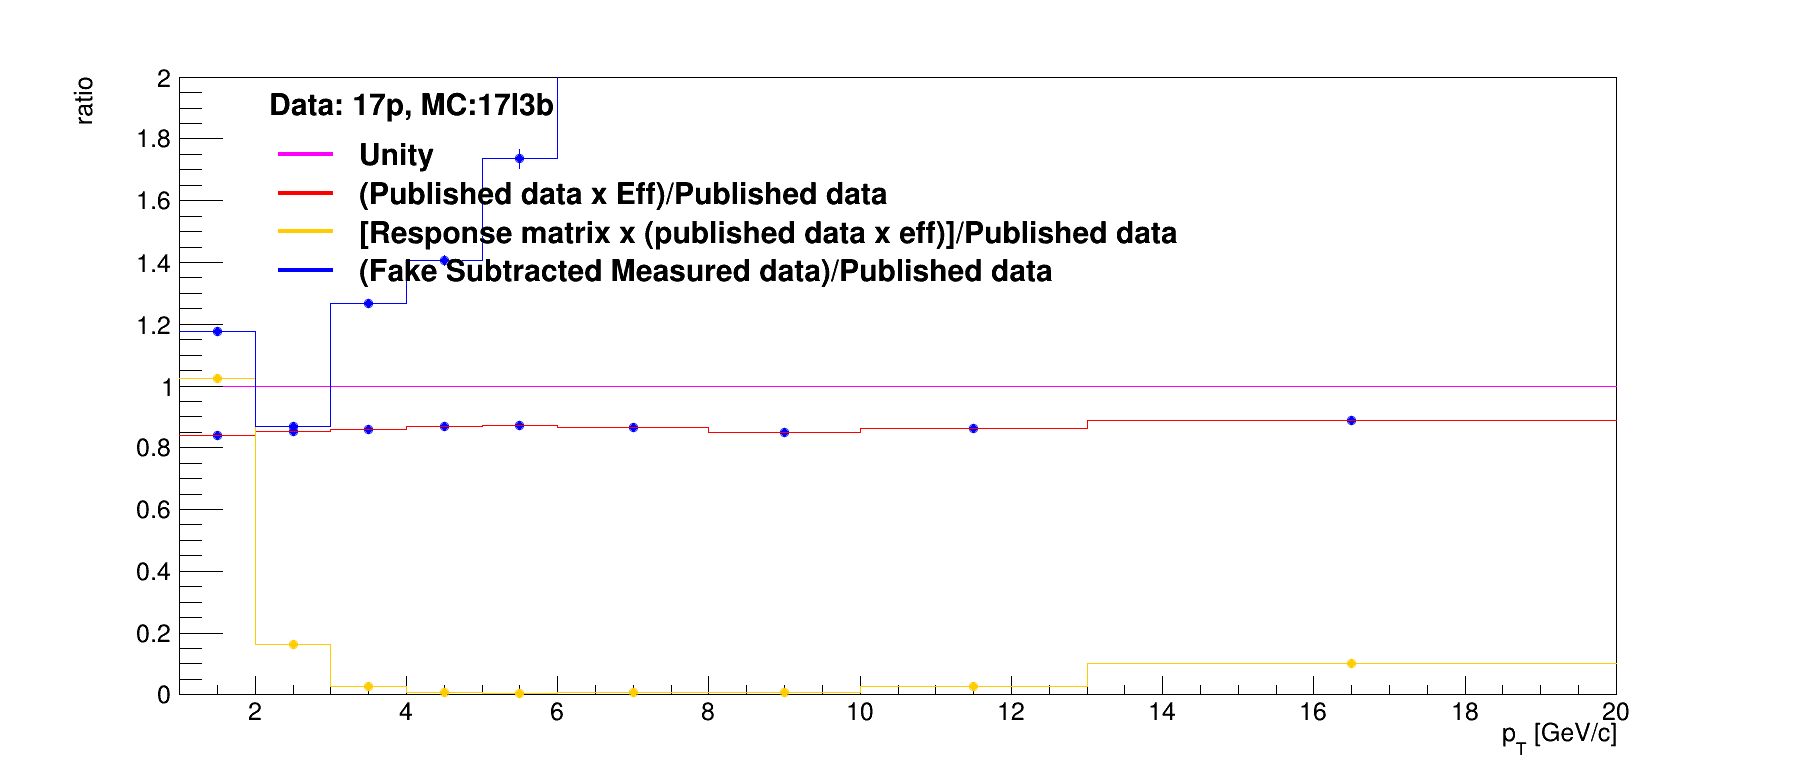

In [128]:
c= ROOT.TCanvas('c','c',1800,800)

ratio_h.SetTitle('; p_{T} [GeV/c]; ratio')
ratio_h.SetMaximum(2.0)
ratio_h.SetMinimum(0.0)
ratio_h.GetXaxis().SetRangeUser(1,20)


ratio_h.Draw('hist')
ratio_h_wEff.Draw('histesame')
ratio_data_refolded.Draw('histesame')
ratio_data_bkgsub.Draw('histesame')

label = Legend("Data: 17p, MC:17l3b")
label.Add(ratio_h,'Unity','L')
label.Add(ratio_h_wEff,'(Published data x Eff)/Published data','L')
label.Add(ratio_data_refolded,'[Response matrix x (published data x eff)]/Published data','L')
label.Add(ratio_data_bkgsub,'(Fake Subtracted Measured data)/Published data','L')
label.Draw(.15,.85)


c.Draw()
#c.SaveAs('ratio_refolding_pp_1GeV20GeV_errors.pdf')
#c.SaveAs('ratio_pink_matrix_scaling2.png')

In [56]:
ratio_refold_pub = h_wEff.Clone()
ratio_refold_pub.Divide(data_refolded)

ratio_refold_data_sub = data_bkgsub.Clone()
ratio_refold_data_sub.Divide(data_refolded)
#ratio_refold_data_sub.SetLineColor(ROOT.kBlue)
#ratio_refold_data_sub.SetMarkerColor(ROOT.kBlue)

ratio_refold_data = data.Clone()
ratio_refold_data.Divide(data_refolded)

print ratio_refold_pub.Integral()

8.01630157232


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


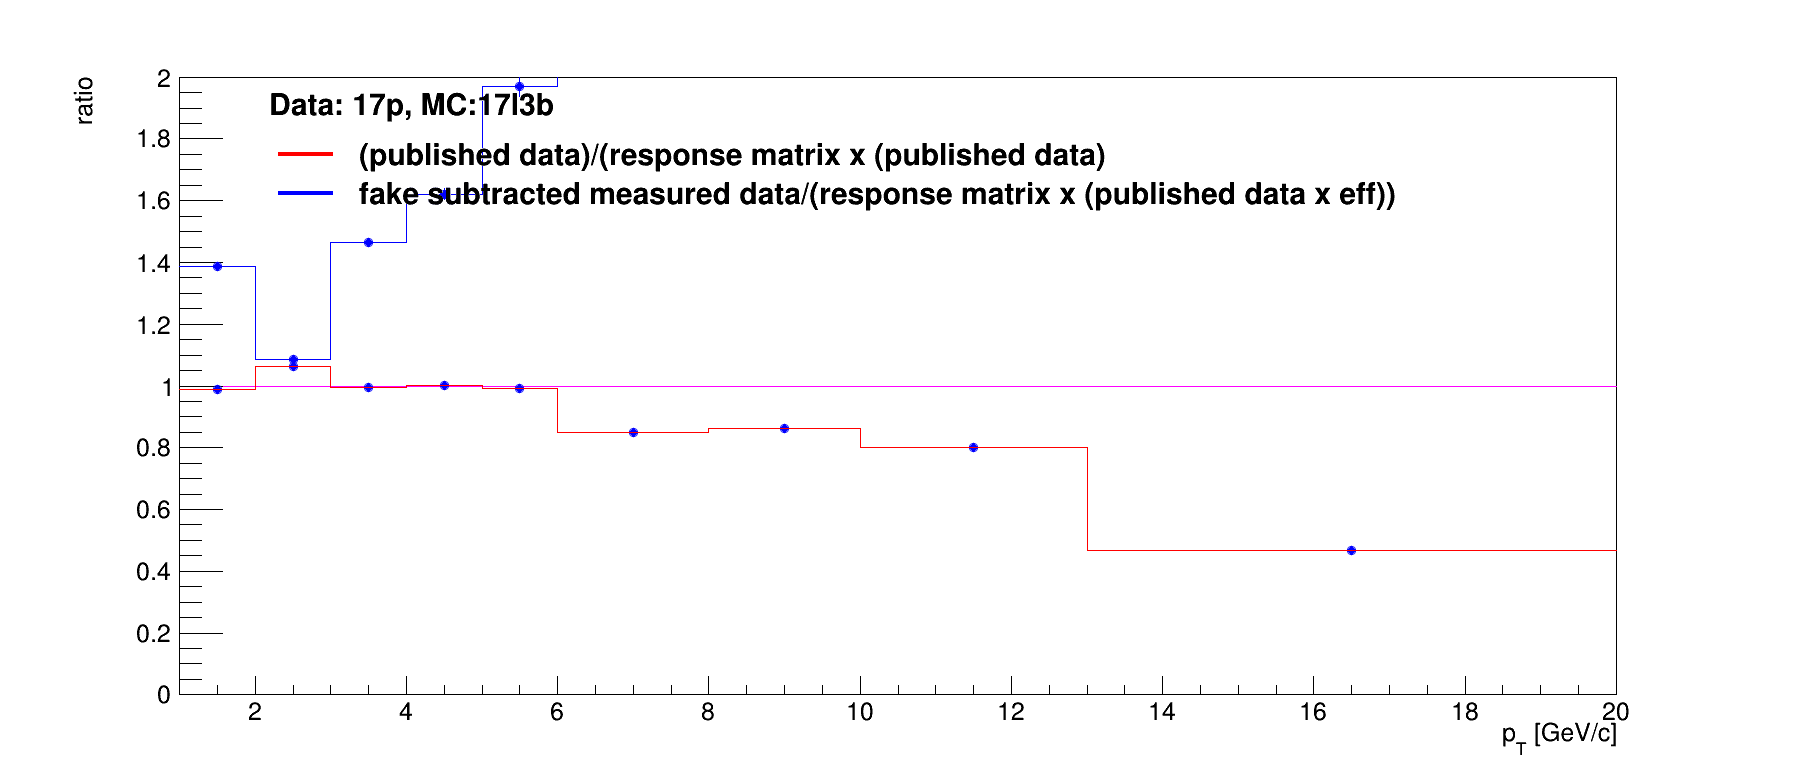

In [57]:
c= ROOT.TCanvas('c','c',1800,800)

ratio_unity = h.Clone()
ratio_unity.Divide(h)
ratio_unity.SetTitle('; p_{T} [GeV/c]; ratio')
ratio_unity.SetMaximum(2.0)
ratio_unity.SetMinimum(0.0)
#ratio_refold_unfoldedSVD.Draw('histsame')
#ratio_refold_data.Draw('histesame')
ratio_unity.GetXaxis().SetRangeUser(1,20)
ratio_unity.Draw('hist')
ratio_refold_pub.Draw('histesame')
ratio_refold_data_sub.Draw('histesame')

label = Legend("Data: 17p, MC:17l3b")
#label.Add(ratio_refold_data,'raw data','L')
label.Add(ratio_refold_pub,'(published data)/(response matrix x (published data)','L')
label.Add(ratio_refold_data_sub,'fake subtracted measured data/(response matrix x (published data x eff))','L')
label.Draw(.15,.85)


c.Draw()
#c.SaveAs('ratio_refolding_pp_1GeV20GeV_errors.pdf')
#c.SaveAs('ratio_refolding_pp_17l3b_wNeutrals_scaling.png')

# Efficiency

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


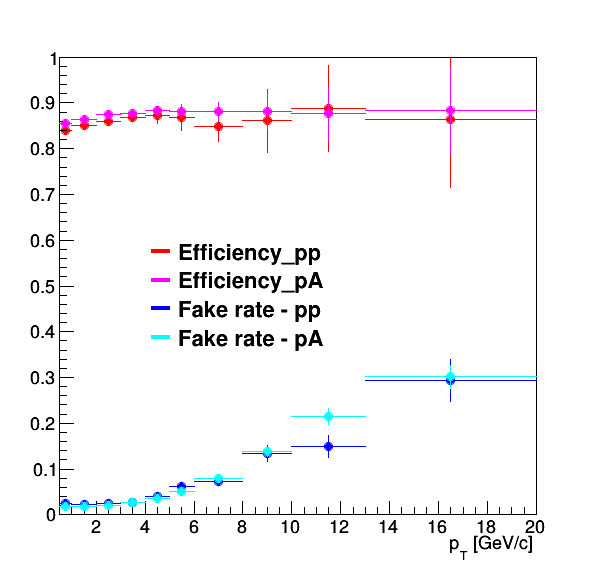

In [59]:
#Get efficiency and fake rate
efficiency_pA = MCfile_pA.Get("hRecoTruth").Clone()#MCfile_pA.Get("Efficiency")
efficiency_pA.Divide(MCfile_pA.Get("hTruth"))
fakerate_pA   = MCfile_pA.Get("FakeRate")

efficiency_pp = MCfile_pp.Get("hRecoTruth").Clone()#MCfile.Get("Efficiency")
efficiency_pp.Divide(MCfile_pp.Get("hTruth"))
fakerate_pp   = MCfile_pp.Get("FakeRate")


#Plot efficiency and fake rate
efficiency_pp.SetTitle(' ; p_{T} [GeV/c];')
efficiency_pp.SetMarkerStyle(20)
efficiency_pp.SetMarkerColor(2)
efficiency_pp.SetLineColor(2)
efficiency_pp.GetXaxis().SetRangeUser(0.5,20)
efficiency_pp.GetYaxis().SetRangeUser(0.0, 1.0)

efficiency_pA.SetTitle(' ; p_{T} [GeV.c];')
efficiency_pA.SetMarkerStyle(20)
efficiency_pA.SetMarkerColor(6)
efficiency_pA.SetLineColor(6)
efficiency_pA.GetXaxis().SetRangeUser(0.5,20)
efficiency_pA.GetYaxis().SetRangeUser(0.0, 1.0)


fakerate_pp.SetMarkerStyle(20)
fakerate_pp.SetLineColor(4)
fakerate_pp.SetMarkerColor(4)

fakerate_pA.SetMarkerStyle(20)
fakerate_pA.SetLineColor(7)
fakerate_pA.SetMarkerColor(7)


c = ROOT.TCanvas('c','c',600,600)
efficiency_pp.Draw()
efficiency_pA.Draw('same')
fakerate_pp.Draw('same')
fakerate_pA.Draw('same')
#efficiency_pp.Fit('pol0', '', '', 1,20)
#efficiency_pA.Fit('pol0', '', '', 1,20)


#label = Legend("MC: 13b2_efix_p1")
label = Legend("")
label.Add(efficiency_pp,'Efficiency_pp','L')
label.Add(efficiency_pA,'Efficiency_pA','L')
label.Add(fakerate_pp,'Fake rate - pp','L')
label.Add(fakerate_pA,'Fake rate - pA','L')
label.Draw(.25,.61)
c.Draw()
#c.SaveAs('EfficiencyFakeRate_tracking_pApp_compare_halfGeV20GeV.png')
#c.SaveAs('EfficiencyFakeRate_tracking_pApp_compare_halfGeV20GeV.pdf')

# Resolution

In [3]:
res_pp = MCfile_pp.Get('g_sigma')
res_pA = MCfile_pA.Get('g_sigma')


res_pp.GetXaxis().SetTitle('p_{T}^{true} [GeV/c]')
res_pp.SetMarkerStyle(20)
res_pp.SetMarkerColor(2)
res_pp.SetLineColor(2)

res_pA.GetXaxis().SetTitle('p_{T}^{true} [GeV/c]')
res_pA.SetMarkerStyle(8)
res_pA.SetMarkerColor(6)
res_pA.SetLineColor(6)


res_pp.SetMinimum(0.0)
res_pp.GetXaxis().SetLimits(1.0,20.0)
res_pp.GetYaxis().SetRangeUser(1.0, 30.0)
res_pp.SetTitle('')

res_pA.SetMinimum(0.0)
res_pA.GetXaxis().SetLimits(1.0,20.0)
res_pA.GetYaxis().SetRangeUser(1.0, 30.0)
res_pA.SetTitle('')


c= ROOT.TCanvas('c','c',800,800)

res_pp.Draw('')
res_pA.Draw('same')

label = Legend("")
label.Add(res_pp, 'pp resolution','L')
label.Add(res_pA, 'pPb resolution','L')
label.Draw(.2, .8)

c.Draw()
#c.SaveAs('ITS_resolution.pdf')
#c.SaveAs('ITS_resolution_20GeV_sameBinning.png')

NameError: name 'MCfile_pp' is not defined

# Smearing

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


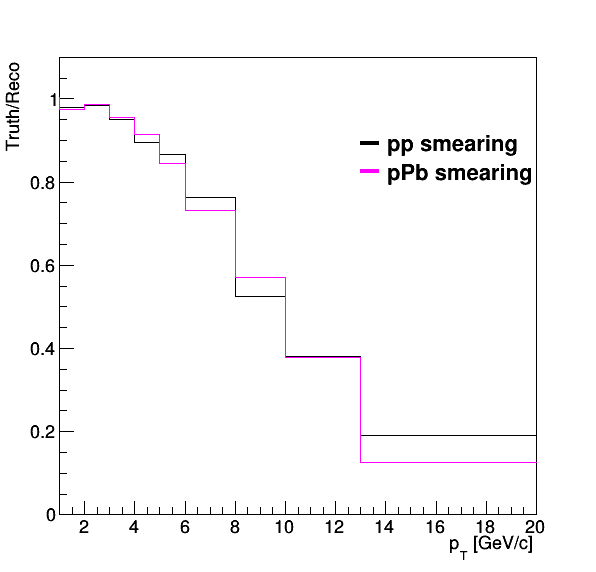

In [61]:
responseMatrix_pp = MCfile_pp.Get("hCorrelation_cor");
responseMatrix_pp.ClearUnderflowAndOverflow()
responseMatrix_pp.SetTitle(';Truth p_{T} [GeV/c];Reconstructed p_{T} [GeV/c]')

responseMatrix_pA = MCfile_pA.Get("hCorrelation_cor");
responseMatrix_pA.ClearUnderflowAndOverflow()
responseMatrix_pA.SetTitle(';Truth p_{T} [GeV/c];Reconstructed p_{T} [GeV/c]')


mc_truth_pp = responseMatrix_pp.ProjectionX()
mc_reco_pp = responseMatrix_pp.ProjectionY()

mc_truth_pA = responseMatrix_pA.ProjectionX()
mc_reco_pA = responseMatrix_pA.ProjectionY()


for i in range(mc_truth_pp.GetNbinsX()):
    binWidth_pp = mc_truth_pp.GetBinWidth(i)
    binCon_truth_pp = mc_truth_pp.GetBinContent(i)
    binCon_reco_pp = mc_reco_pp.GetBinContent(i)
    mc_truth_pp.SetBinContent(i, binCon_truth_pp/binWidth_pp)
    mc_reco_pp.SetBinContent(i, binCon_reco_pp/binWidth_pp)

    
for i in range(mc_truth_pA.GetNbinsX()):
    binWidth_pA = mc_truth_pA.GetBinWidth(i)
    binCon_truth_pA = mc_truth_pA.GetBinContent(i)
    binCon_reco_pA = mc_reco_pA.GetBinContent(i)
    mc_truth_pA.SetBinContent(i, binCon_truth_pA/binWidth_pA)
    mc_reco_pA.SetBinContent(i, binCon_reco_pA/binWidth_pA)


ratio_mc_pp = mc_truth.Clone()
ratio_mc_pp.Divide(mc_reco_pp)
ratio_mc_pp.SetMinimum(0.0)
ratio_mc_pp.SetMaximum(1.1)
ratio_mc_pp.SetLineColor(2)
ratio_mc_pp.SetMarkerColor(2)
ratio_mc_pp.SetMarkerStyle(20)
ratio_mc_pp.GetXaxis().SetRangeUser(0.5,20)
ratio_mc_pp.SetTitle(' ; p_{T} [GeV/c]; Truth/Reco')

ratio_mc_pA = mc_truth_pA.Clone()
ratio_mc_pA.Divide(mc_reco_pA)
ratio_mc_pA.SetMinimum(0.0)
ratio_mc_pA.SetMaximum(1.1)
ratio_mc_pA.SetLineColor(6)
ratio_mc_pp.SetMarkerColor(5)
ratio_mc_pA.SetMarkerStyle(20)
ratio_mc_pA.GetXaxis().SetRangeUser(0.5,20)
ratio_mc_pA.SetTitle(' ; p_{T} [GeV/c]; Truth/Reco')



##draw mc truth, mc reco, response matrix
c = ROOT.TCanvas('c','c',600,600)

ratio_mc.Draw('histe')
ratio_mc_pA.Draw('histesame')

label = Legend("")
label.Add(ratio_mc, 'pp smearing','L')
label.Add(ratio_mc_pA, 'pPb smearing','L')
label.Draw(.6, .8)

c.Draw()

#c.SaveAs('Smearing_ITS_compare_halfGeV20GeV.png')

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file data_spectra.png has been created


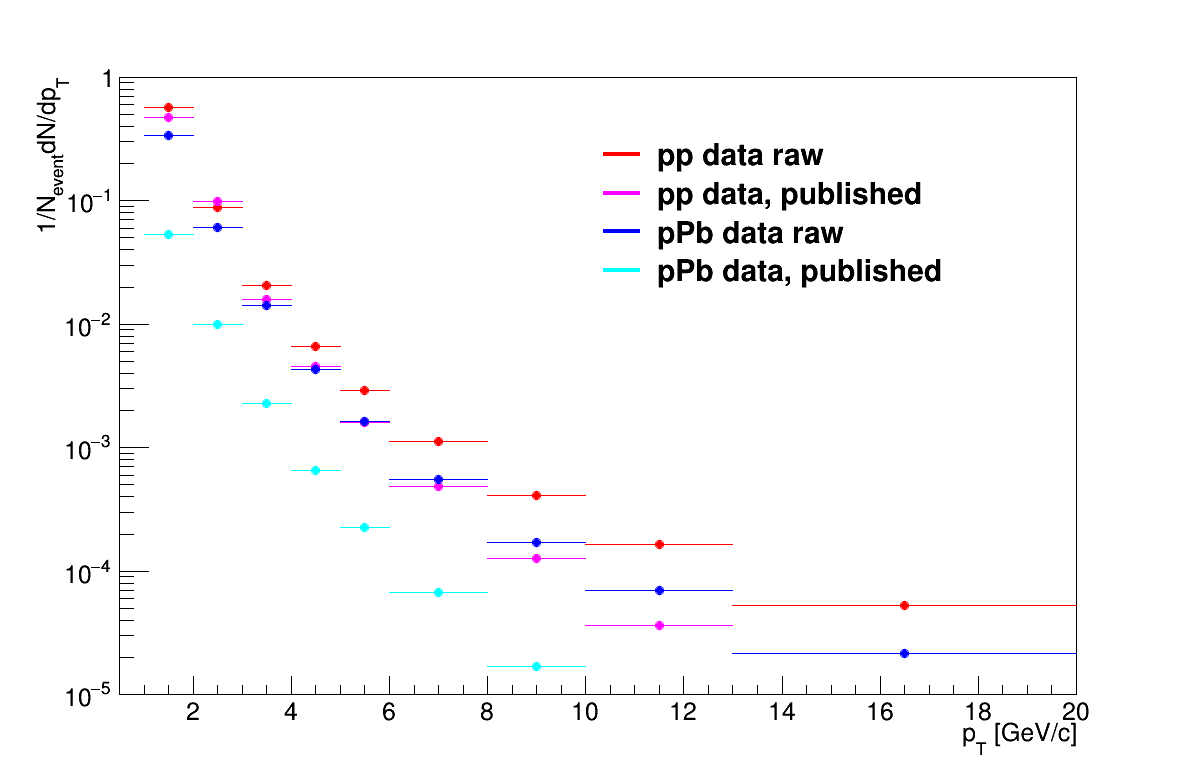

In [65]:
h_pPb.Scale(1.0/7.0)
c= ROOT.TCanvas('c','c',1200,800)
data_pp.Draw('e')
h.Draw('esame')
data_pA.Draw('esame')
h_pPb.Draw('esame')

label = Legend("")
label.Add(data_pp,'pp data raw','L')
label.Add(h,'pp data, published','L')
label.Add(data_pA,'pPb data raw','L')
label.Add(h_pPb,'pPb data, published','L')
label.Draw(.5,.85)

c.SetLogy()
c.Draw()
c.SaveAs('data_spectra.png')

# Eta Phi Comparison

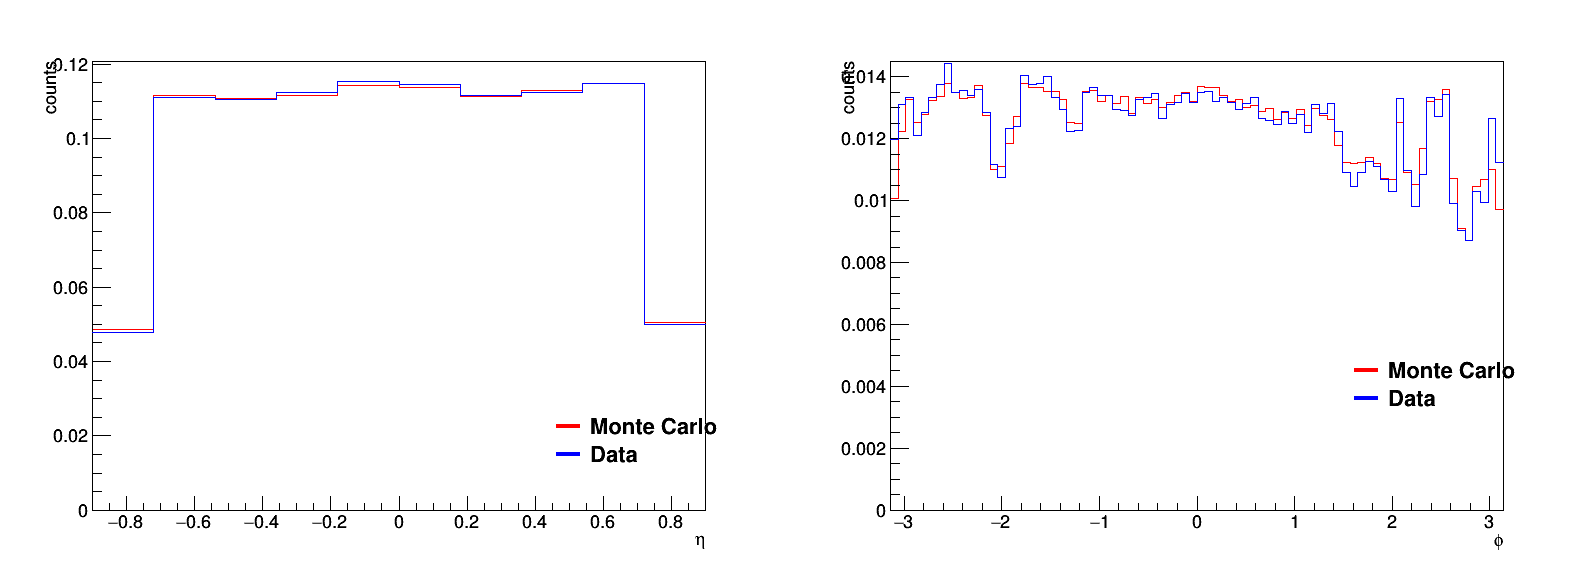

In [5]:
hEtaMC = MCfile.Get('hReco_eta')
hPhiMC = MCfile.Get('hReco_phi')

hEtaData = Datafile.Get('hReco_eta')
hPhiData = Datafile.Get('hReco_phi')

#hEtaMC.Scale(hEtaData.Integral()/hEtaMC.Integral())
#hPhiMC.Scale(hPhiData.Integral()/hPhiMC.Integral())

c = ROOT.TCanvas('c','c',1600,600)
c.Divide(2)
c.cd(1)
label = Legend("")

hEtaStack = ROOT.THStack()
hEtaMC.SetLineColor(2)
hEtaMC.SetMarkerColor(2)
hEtaMC.SetMarkerStyle(20)
hEtaData.SetLineColor(4)
hEtaData.SetMarkerColor(4)
hEtaData.SetMarkerStyle(20)
hEtaMC.SetTitle('; #eta; counts')
hEtaData.SetTitle('; #eta; counts')
hEtaMC.SetMinimum(0.0)
hEtaData.SetMinimum(0.0)


#hEtaStack.Add(hEtaMC)
#hEtaStack.Add(hEtaData)
hEtaMC.DrawNormalized('hist')
hEtaData.DrawNormalized('histsame')
label.Add(hEtaMC, 'Monte Carlo','L')
label.Add(hEtaData, 'Data','L')
               
#hEtaStack.SetTitle('; #eta; counts')
#hEtaStack.Draw('nostack')
#ROOT.gPad.SetLogy()
label.Draw(.7,.3)
c.cd(2)

hPhiStack = ROOT.THStack()
label = Legend("")

hPhiStack = ROOT.THStack()
hPhiMC.SetLineColor(2)
hPhiMC.SetMarkerColor(2)
hPhiMC.SetMarkerStyle(20)
hPhiData.SetLineColor(4)
hPhiData.SetMarkerColor(4)
hPhiData.SetMarkerStyle(20)
hPhiMC.SetTitle('; #phi; counts')
hPhiData.SetTitle('; #phi; counts')
hPhiMC.SetMinimum(0.0)
hPhiData.SetMinimum(0.0)

#hPhiStack.Add(hPhiMC)
#hPhiStack.Add(hPhiData)
hPhiMC.DrawNormalized('hist')
hPhiData.DrawNormalized('histsame')
label.Add(hPhiMC, 'Monte Carlo','L')
label.Add(hPhiData, 'Data','L')
               
#hPhiStack.SetTitle('; #phi; counts')
#hPhiStack.Draw('nostack')
#ROOT.gPad.SetLogy()
label.Draw(.7,.4)
c.Draw()
#c.SaveAs("EtaPhi_distribution_pp_17l3b_wNeutrals.png")

# Eta/Phi Efficiency

80


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


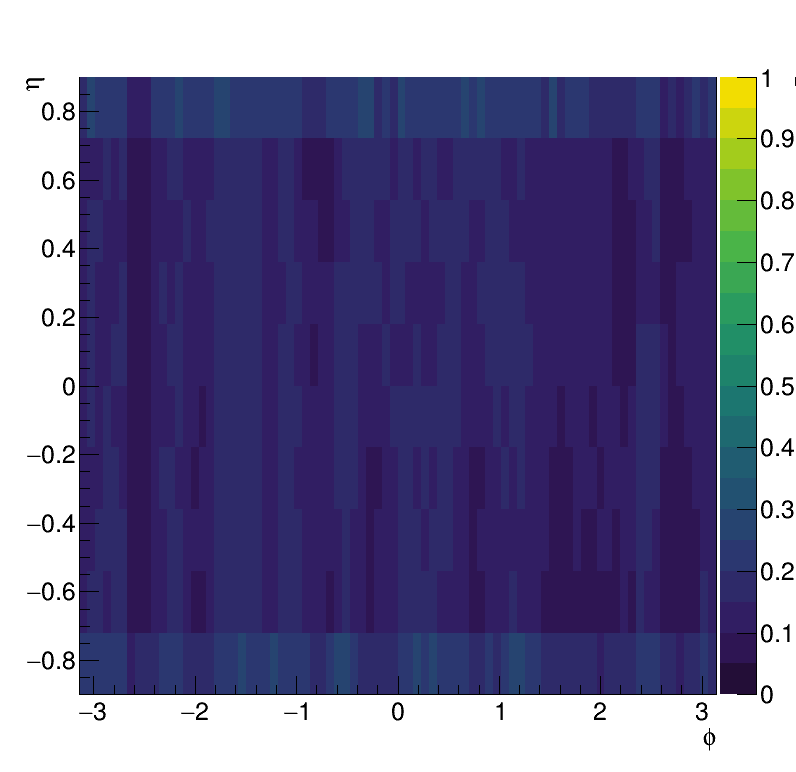

In [55]:
hRecoTruth_etaphi = MCfile.Get('hRecoTruth_phiEta')
hTruth_etaphi = MCfile.Get('hTruth_phiEta')

h2DEff = hRecoTruth_etaphi.Clone()
h2DEff.Divide(hTruth_etaphi)
h2DEff.SetTitle(';#phi;#eta;#epsilon')
#h2DEff.GetZaxis().SetLimits(0.0,1.0)
h2DEff.SetMinimum(0)
h2DEff.SetMaximum(1)

print hRecoTruth_etaphi.GetNbinsX()

c= ROOT.TCanvas('c','c',800,800)

h2DEff.Draw('COLZ')
c.Draw()
#c.SaveAs('etaPhi_eff_tpc.pdf')

In [56]:
hReco_phi = MCfile.Get('hReco_phi')
hRecoTruth_phi = MCfile.Get('hRecoEmbed_phi')
hTruth_phi = MCfile.Get('hTruth_phi')
hPhi_data = Datafile.Get('hReco_phi')
hPhi_eff = hRecoTruth_phi.Clone()
hPhi_eff.Divide(hTruth_phi)
#hPhi_eff = h2DEff.ProjectionX()

hPhi_data_cor = hPhi_data.Clone()

hPhi_eff.SetMinimum(0)
hPhi_eff.SetMaximum(1)
hPhi_eff.SetTitle(";#phi;#epsilon")
hPhi_eff.SetLineColor(ROOT.kRed)
c= ROOT.TCanvas('c','c',1200,800)
                
hPhi_eff.Draw('hist')
label = Legend(title = 'ITS:Minimum Bias Data')
label.Add(hPhi_eff, 'Efficiency in #phi','L')
label.Draw(0.5,0.3)
c.Draw()
#c.SaveAs('its_phi_eff.pdf')

print hPhi_data.GetNbinsX()
print hPhi_eff.Integral()

for i in range(hPhi_data.GetNbinsX()):
    dPhi = hPhi_data.GetBinWidth(i+1)
    dN = hPhi_data.GetBinContent(i+1)
    dN_dPhi = dN/dPhi
    eff = hPhi_eff.GetBinContent(i+1)
    hPhi_data.SetBinContent(i+1,dN_dPhi)
    hPhi_data_cor.SetBinContent(i+1,dN_dPhi/eff)
    #print dPhi, dN, dN_dPhi, eff

ReferenceError: attempt to access a null-pointer

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


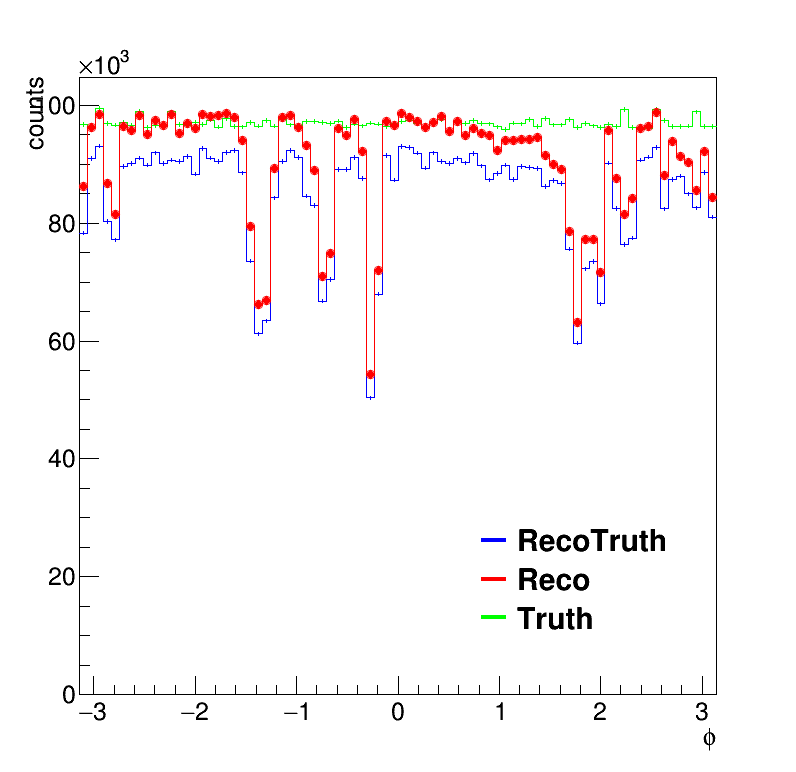

In [34]:
hReco_phi.SetLineColor(ROOT.kRed)
hReco_phi.SetMinimum(0)
hReco_phi.SetTitle(";#phi;counts")
hRecoTruth_phi.SetLineColor(ROOT.kBlue)
hRecoTruth_phi.SetMinimum(0)
hRecoTruth_phi.SetTitle(";#phi;counts")
hTruth_phi.SetLineColor(ROOT.kGreen)
hTruth_phi.SetMinimum(0)
hTruth_phi.SetTitle(";#phi;counts")

c= ROOT.TCanvas('c','c',800,800)
                
#hPhi_eff.Draw('hist')
hTruth_phi.Draw('histe')
hRecoTruth_phi.Draw('histesame')
hReco_phi.Draw('histesame')
label = Legend("")
label.Add(hRecoTruth_phi, 'RecoTruth','L')
label.Add(hReco_phi, 'Reco','L')
label.Add(hTruth_phi, 'Truth','L')
label.Draw(0.6,0.35)
c.Draw()
#c.SaveAs('tpc_phiRT.pdf')

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: pdf file phi_efficiency_cor_its.pdf has been created


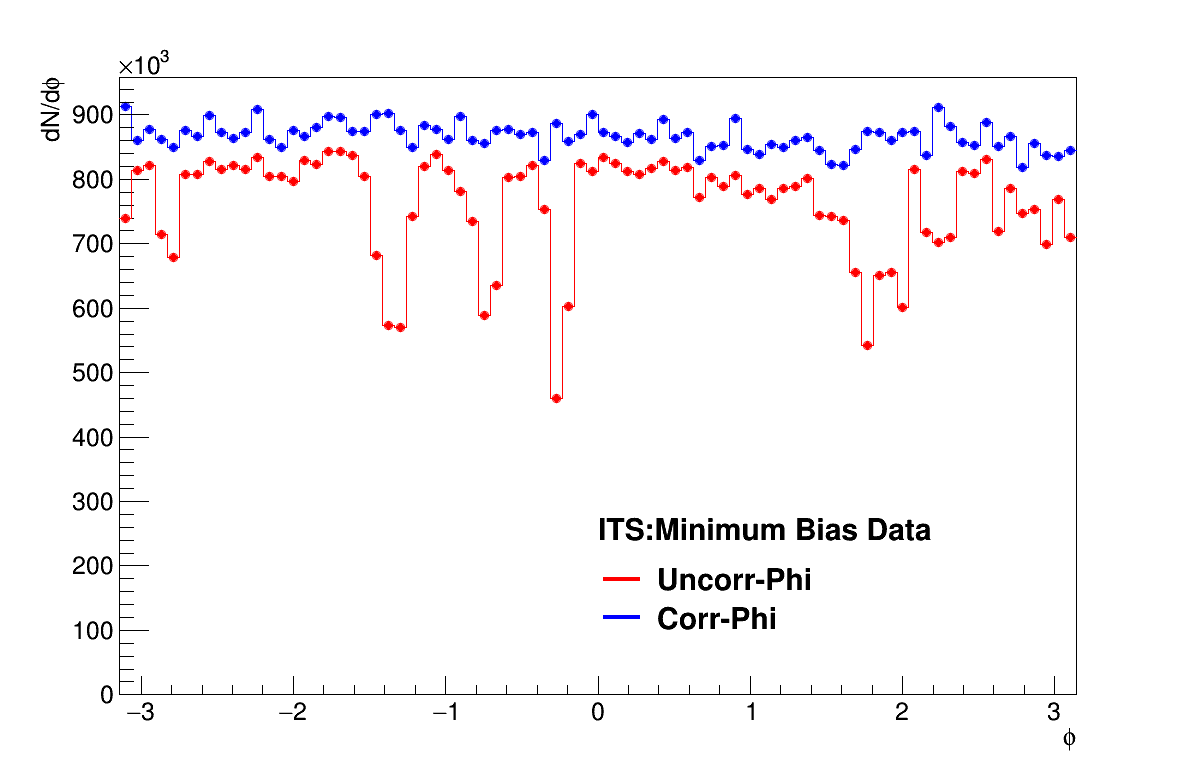

In [36]:
hPhi_data.SetTitle(';#phi;dN/d#phi')
hPhi_data.SetLineColor(ROOT.kRed)
hPhi_data.SetMarkerStyle(20)
hPhi_data.SetMarkerColor(ROOT.kRed)
hPhi_data.SetMinimum(0.0)
hPhi_data_cor.SetTitle(';#phi;dN/d#phi')
hPhi_data_cor.SetLineColor(ROOT.kBlue)
hPhi_data_cor.SetMarkerStyle(20)
hPhi_data_cor.SetMarkerColor(ROOT.kBlue)
hPhi_data_cor.SetMinimum(0.0)

c= ROOT.TCanvas('c','c',1200,800)
hPhi_data_cor.Draw('histe')
hPhi_data.Draw('histesame')

label = Legend(title = 'ITS:Minimum Bias Data')
label.Add(hPhi_data, 'Uncorr-Phi','L')
label.Add(hPhi_data_cor, 'Corr-Phi','L')
label.Draw(0.5,0.3)

c.Draw()
#c.SaveAs('phi_efficiency_cor_its.pdf')

10
8.61232203245

****************************************
Minimizer is Linear
Chi2                      =      42.8006
NDf                       =            9
p0                        =     0.861869   +/-   0.000454938 


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: pdf file its_eta_eff.pdf has been created


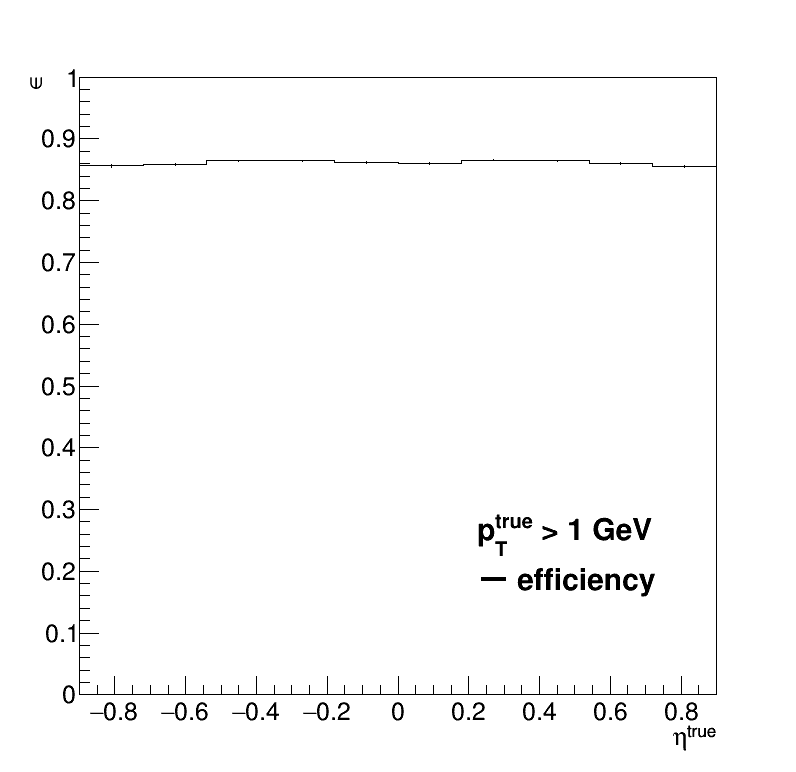

In [18]:
hReco_eta = MCfile.Get('hReco_eta')
hRecoTruth_eta = MCfile.Get('hRecoEmbed_eta')
hTruth_eta = MCfile.Get('hTruth_eta')
heta_data = Datafile.Get('hReco_eta')
heta_eff = hRecoTruth_eta.Clone()
heta_eff.Divide(hTruth_eta)
#heta_eff = h2DEff.ProjectionX()

heta_data_cor = heta_data.Clone()

heta_eff.SetMinimum(0)
heta_eff.SetMaximum(1)
heta_eff.SetTitle(";#eta^{true};#epsilon")
heta_eff.SetLineColor(ROOT.kBlack)
c= ROOT.TCanvas('c','c',800,800)

label = Legend("p_{T}^{true} > 1 GeV")
label.Add(heta_eff, 'efficiency','L')
                
heta_eff.Draw('histe')
heta_eff.Fit('pol0')
label.Draw(0.6,0.3)
c.Draw()
c.SaveAs('its_eta_eff.pdf')

print heta_data.GetNbinsX()
print heta_eff.Integral()

#for i in range(heta_data.GetNbinsX()):
#    deta = heta_data.GetBinWidth(i+1)
#    dN = heta_data.GetBinContent(i+1)
#    dN_deta = dN/deta
#    eff = heta_eff.GetBinContent(i+1)
#    heta_data.SetBinContent(i+1,dN_deta)
#    heta_data_cor.SetBinContent(i+1,dN_deta/eff)
#    #print deta, dN, dN_deta, eff

# ITS Resolution

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: pdf file gaussianReso_tpc.pdf has been created


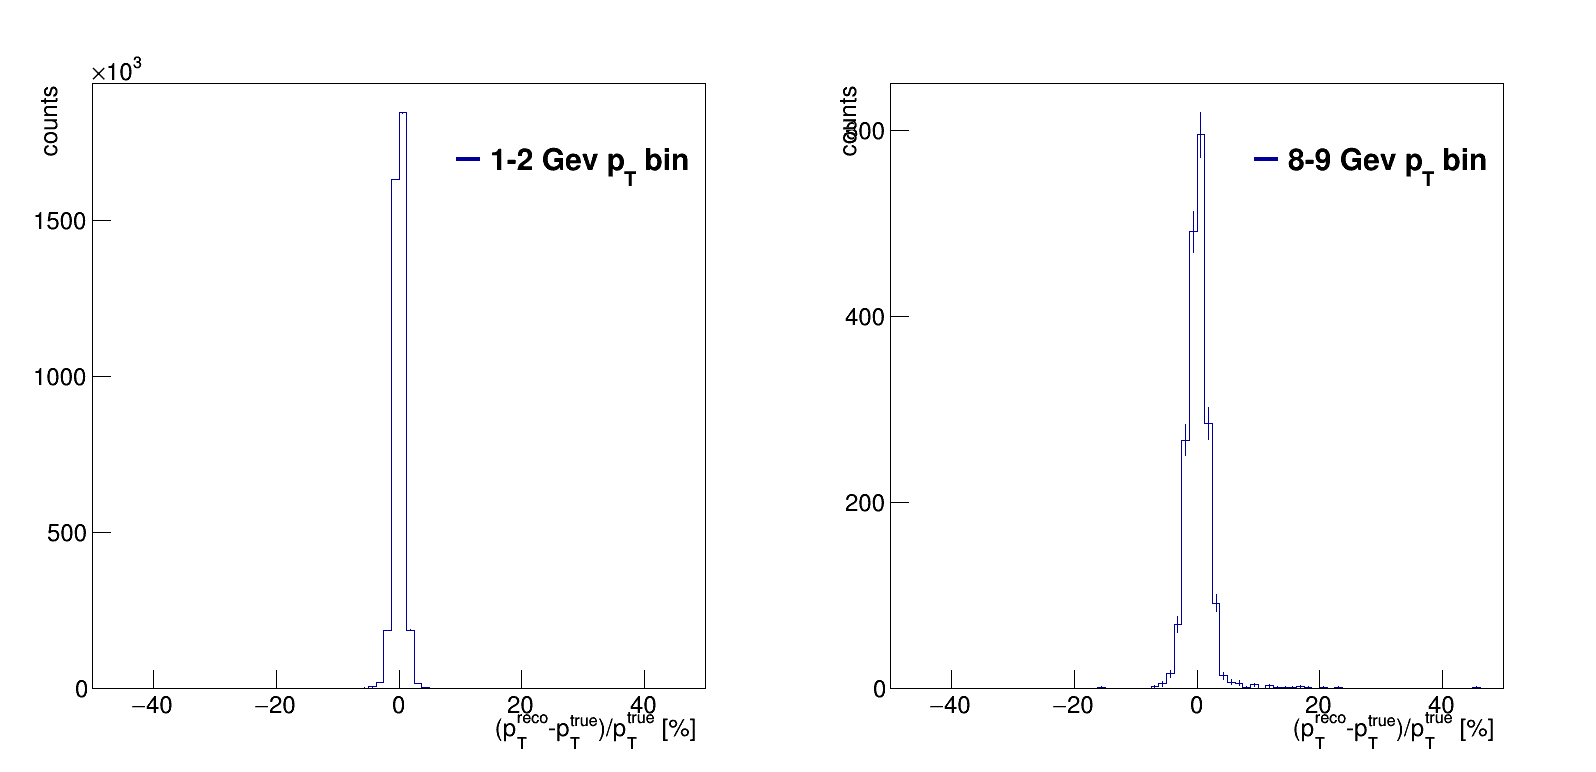

In [69]:
resProj = ROOT.TFile('/home/dhruv/projections_13b2_3_21bins_1GeV30GeV_2M_ResCut.root')
#resProj = ROOT.TFile('/home/dhruv/projections_13b2_21bins_1GeV30GeV_5M_ResCut.root')
resProj_1GeV2GeV = resProj.Get('trackResProjection0_13b2_TrackBit3')
resProj_8GeV9GeV = resProj.Get('trackResProjection7_13b2_TrackBit3')
#resProj_8GeV9GeV.Rebin(2)

c= ROOT.TCanvas('c','c',1600,800)
c.Divide(2,1)
c.cd(1)
resProj_1GeV2GeV.Draw('histe')
label = Legend("")
label.Add(resProj_1GeV2GeV, '1-2 Gev p_{T} bin','L')
label.Draw(0.57,0.85)

c.cd(2)
resProj_8GeV9GeV.Draw('histe')
label = Legend("")
label.Add(resProj_8GeV9GeV, '8-9 Gev p_{T} bin','L')
label.Draw(0.57,0.85)
c.Draw()
c.SaveAs('gaussianReso_tpc.pdf')

# Eta Efficiency

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


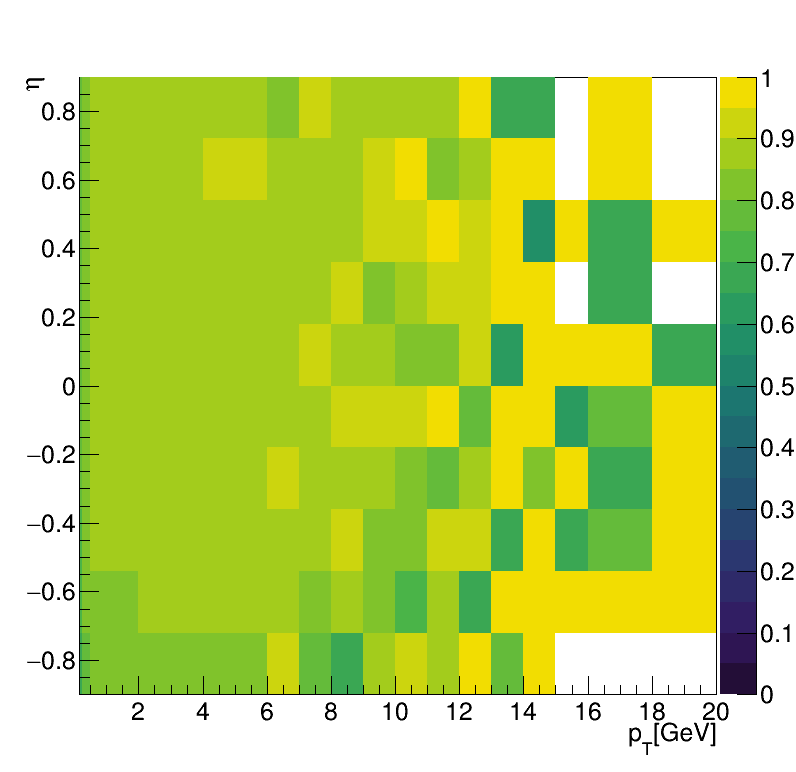

In [47]:
hRecoTruth_ptEta = MCfile.Get('hRecoTruth_ptEta')
hTruth_ptEta = MCfile.Get('hTruth_ptEta')
ptEtaEff = hRecoTruth_ptEta.Clone()
ptEtaEff.Divide(hTruth_ptEta)
ptEtaEff.SetTitle(';p_{T}[GeV];#eta')
ptEtaEff.GetZaxis().SetRangeUser(0,1)
ptEtaEff.GetXaxis().SetRangeUser(0.15,20)
c= ROOT.TCanvas('c','c',800,800)
ptEtaEff.Draw("colz")
c.Draw()
#c.SaveAs('ptEtaEff.png')

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: pdf file etaEff_diffpt.pdf has been created


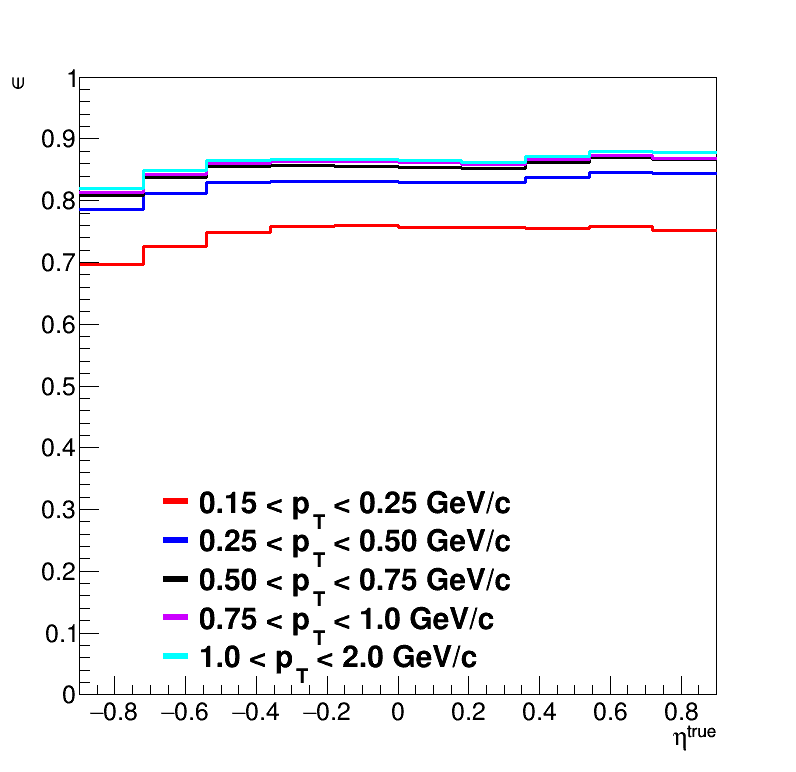

In [49]:
etaEff_bin1 = ptEtaEff.ProjectionY('etaEff_bin1', 1,1)
etaEff_bin1.SetTitle(';#eta^{true};#epsilon')
etaEff_bin1.SetLineColor(ROOT.kRed)
etaEff_bin1.SetLineWidth(3)
etaEff_bin1.SetMinimum(0.0)
etaEff_bin1.SetMaximum(1.0)

etaEff_bin2 = ptEtaEff.ProjectionY('etaEff_bin2', 2,2)
etaEff_bin2.SetLineColor(ROOT.kBlue)
etaEff_bin2.SetLineWidth(3)

etaEff_bin3 = ptEtaEff.ProjectionY('etaEff_bin3', 3,3)
etaEff_bin3.SetLineColor(ROOT.kBlack)
etaEff_bin3.SetLineWidth(3)

etaEff_bin4 = ptEtaEff.ProjectionY('etaEff_bin4', 4,4)
etaEff_bin4.SetLineColor(ROOT.kViolet)
etaEff_bin4.SetLineWidth(3)

etaEff_bin5 = ptEtaEff.ProjectionY('etaEff_bin5', 5,5)
etaEff_bin5.SetLineColor(ROOT.kCyan)
etaEff_bin5.SetLineWidth(3)

c= ROOT.TCanvas('c','c',800,800)

etaEff_bin1.Draw('histe')
etaEff_bin2.Draw('histesame')
etaEff_bin3.Draw('histesame')
etaEff_bin4.Draw('histesame')
etaEff_bin5.Draw('histesame')

label = Legend("")
label.Add(etaEff_bin1, '0.15 < p_{T} < 0.25 GeV/c','L')
label.Add(etaEff_bin2, '0.25 < p_{T} < 0.50 GeV/c','L')
label.Add(etaEff_bin3, '0.50 < p_{T} < 0.75 GeV/c','L')
label.Add(etaEff_bin4, '0.75 < p_{T} < 1.0 GeV/c','L')
label.Add(etaEff_bin5, '1.0 < p_{T} < 2.0 GeV/c','L')

label.Draw(.2, .4)

c.Draw()
#c.SaveAs("etaEff_diffpt.png")
#c.SaveAs("etaEff_diffpt.pdf")

# Z Vertex Ratios

In [1]:
#Datafile_zv = ROOT.TFile('/home/dhruv/fout_3_13b_pass4_v1_3run_pPb_zv_all_new.root')
#MCfile_zv = ROOT.TFile('/home/dhruv/17g6a3_16_1GeV16GeV_all_new.root')

#zv_data = Datafile_zv.Get('hZvertex')
#zv_MC = MCfile_zv.Get('hZvertex')

#zv_corection = zv_MC.clone()
#zv_correction.Divide(zv_data)



# Unfolding

In [144]:
response= RooUnfoldResponse(mc_reco, mc_truth, responseMatrix)
response.UseOverflow(ROOT.kFALSE)
data_unfolded = {}
#for tau in range(4,6):
#    data_unfolded['SVD%i'%tau] = RooUnfoldSvd(response, data_inputforunfolding, tau).Hreco();

data_unfolded['SVD8'] = RooUnfoldSvd(response, data_inputforunfolding, 12).Hreco();
data_unfolded['SVD9'] = RooUnfoldSvd(response, data_inputforunfolding, 13).Hreco();

print data_unfolded

{'SVD9': <ROOT.TH1D object ("hCorrelation_cor") at 0x6cfd2d0>, 'SVD8': <ROOT.TH1D object ("hCorrelation_cor") at 0x3d45be0>}
Subtract -7.48924e-05 fakes from measured distribution
SVD init 21 x 21 bins, kreg=12
Subtract -7.48924e-05 fakes from measured distribution
SVD init 21 x 21 bins, kreg=13


Warning in <TH2D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH2D::Sumw2>: Sum of squares of weights structure already created
Info in <TSVDUnfold_130729::Unfold>: Unfolding param: 12
Info in <TSVDUnfold_130729::Unfold>: Curvature of weight distribution: 98.112447
Warning in <TH2D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH2D::Sumw2>: Sum of squares of weights structure already created
Info in <TSVDUnfold_130729::Unfold>: Unfolding param: 13
Info in <TSVDUnfold_130729::Unfold>: Curvature of weight distribution: 369.007187


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


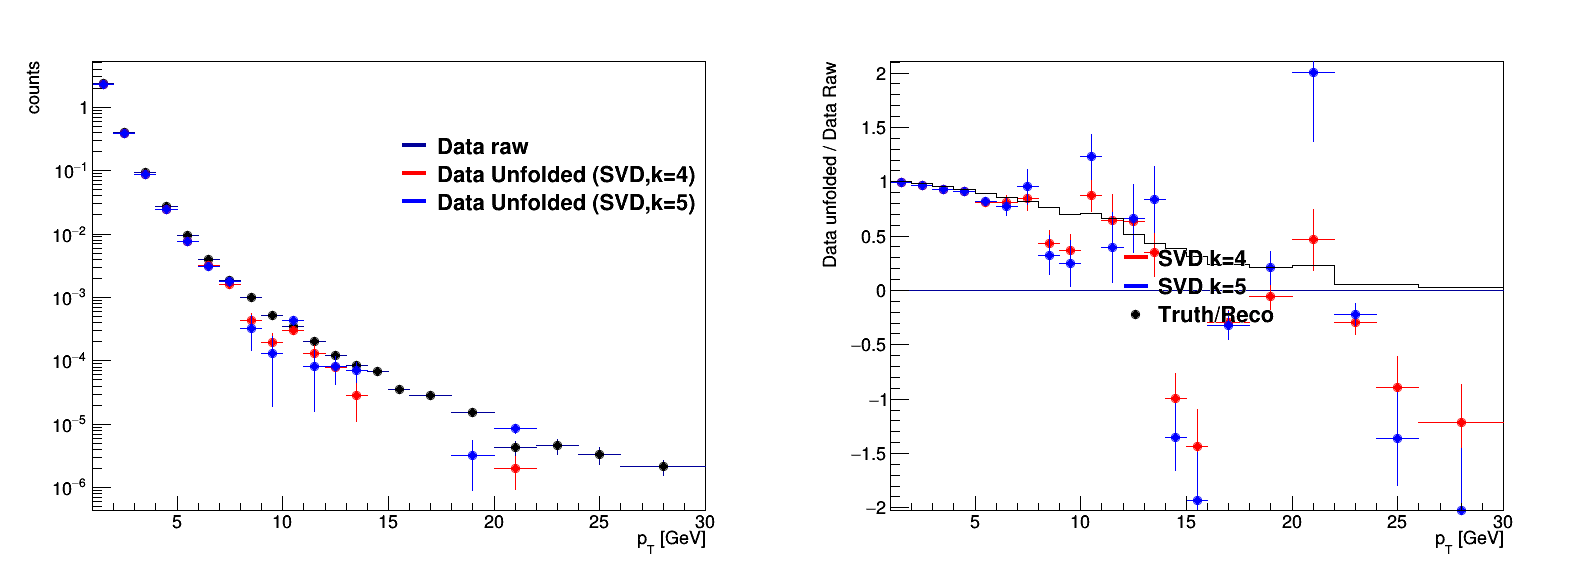

In [145]:
c = ROOT.TCanvas('c','c',1600,600)
c.Divide(2)
c.cd(1)
label = Legend("")

hstack = ROOT.THStack()
hstack.Add(data)
label.Add(data,'Data raw','L')

data.SetMarkerStyle(20)
data_unfolded['SVD8'].SetLineColor(2)
data_unfolded['SVD8'].SetMarkerColor(2)
data_unfolded['SVD8'].SetMarkerStyle(20)
data_unfolded['SVD9'].SetLineColor(4)
data_unfolded['SVD9'].SetMarkerColor(4)
data_unfolded['SVD9'].SetMarkerStyle(20)

hstack.Add(data_unfolded['SVD8'])
hstack.Add(data_unfolded['SVD9'])
label.Add(data_unfolded['SVD8'], 'Data Unfolded (SVD,k=4)','L')
label.Add(data_unfolded['SVD9'], 'Data Unfolded (SVD,k=5)','L')
               
hstack.SetTitle('; p_{T} [GeV]; counts')
hstack.Draw('nostack')
ROOT.gPad.SetLogy()
label.Draw(.5,.8)
c.cd(2)

hs_ratio = ROOT.THStack()
label = Legend("")

ratio = {}
ratio['SVD8'] = data_unfolded['SVD8'].Clone()
ratio['SVD8'].Divide(data) 
ratio['SVD9'] = data_unfolded['SVD9'].Clone()
ratio['SVD9'].Divide(data) 

hs_ratio.Add( ratio['SVD8'])
hs_ratio.Add( ratio['SVD9'])

label.Add(ratio['SVD8'],'SVD k=4','L')
label.Add(ratio['SVD9'],'SVD k=5','L')

#simple bin-by-bin unfolding
ratio_mc.SetMarkerStyle(20)
ratio_mc.SetMarkerSize(1)
ratio_mc.SetMarkerColor(1)

hs_ratio.Add(ratio_mc)

hs_ratio.SetTitle('; p_{T} [GeV]; Data unfolded / Data Raw')
hs_ratio.Draw('nostack')
label.Add(ratio_mc, 'Truth/Reco','P')
label.Draw(.4,.6)
c.Draw()
#c.SaveAs('Unfoldedresult_tracking_its_4Layers.png')

# Published data

### EFFICIENCY CORRECTION

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


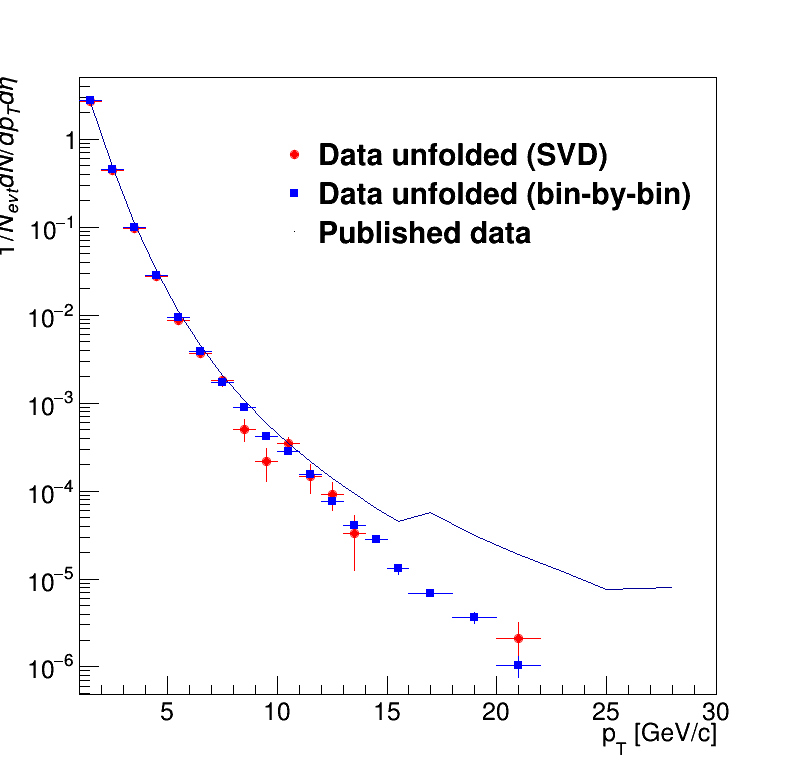

In [146]:
#efficiency.Print()
#applying efficiency
def applyEfficiencyCorrection(histo):
    histo_corrected = histo.Clone()
    for i in range(1,histo.GetNbinsX()+1):
        pt = ROOT.Double()
        eff = ROOT.Double()
        #efficiency.(i-1,pt,eff)
        #print pt, eff
        eff = efficiency.GetBinContent(i)
        histo_corrected.SetBinContent(i,histo.GetBinContent(i)/eff)
        histo_corrected.SetBinError(i,histo.GetBinError(i)/eff)
    return histo_corrected


data_unfolded_SVD_4_corrected = applyEfficiencyCorrection(data_unfolded['SVD8'])
data_unfolded_SVD_5_corrected = applyEfficiencyCorrection(data_unfolded['SVD9'])

data_corrected = data.Clone()
data_onlyeff   = data.Clone()

data_corrected.Multiply(ratio_mc) #applying "naive unfolding"
data_onlyeff = applyEfficiencyCorrection(data_onlyeff)


data_corrected= applyEfficiencyCorrection(data_corrected)
c= ROOT.TCanvas('c','c',800,800)
#c.Divide(2)
#c.cd(1)
data_unfolded_SVD_4_corrected.SetTitle('; p_{T} [GeV/c]; 1/N_{evt} dN/dp_{T}d\eta')
data_unfolded_SVD_4_corrected.SetMarkerStyle(20)
data_unfolded_SVD_4_corrected.SetMarkerColor(2)
#data_unfolded_SVD_4_corrected.GetXaxis().SetRangeUser(1,12)
data_unfolded_SVD_4_corrected.Draw()
data_unfolded_SVD_5_corrected.SetMarkerStyle(21)
data_unfolded_SVD_5_corrected.SetMarkerColor(ROOT.kOrange+1)
data_unfolded_SVD_5_corrected.SetLineColor(ROOT.kOrange+1)
#data_unfolded_SVD_5_corrected.Draw('same')
h.Draw('histLsame')
data_corrected.SetTitle('; p_{T} [GeV/c]; 1/N_{evt} dN/dp_{T}d\eta')
data_corrected.SetMarkerColor(4)
data_corrected.SetLineColor(4)
#data_corrected.Draw('histsame')
data_corrected.SetMarkerStyle(21)
data_onlyeff.SetLineColor(3)
data_onlyeff.SetMarkerColor(3)
data_onlyeff.SetMarkerStyle(21)
#data_onlyeff.Draw('histsame')
data_corrected.SetMarkerStyle(21)
data_corrected.Draw('same')

label = Legend("")
label.Add(data_unfolded_SVD_4_corrected,'Data unfolded (SVD)')
label.Add(data_corrected,'Data unfolded (bin-by-bin)')
#label.Add(data_unfolded_SVD_5_corrected,'Data unfolded (SVD k=5) + eff corr.','L')
label.Add(h,'Published data')
#label.Add(data_onlyeff,'Data + eff corr.','L')
#label.Add(data_corrected,'Data unfolded (bin-by-bin) + eff corr.','L')
label.Draw(.35,.85)

ROOT.gPad.SetLogy()



#c.SaveAs('UnfoldedSpectraAndPublishedResult_tracking_pPb_its_4Layers.png')
c.Draw()

In [147]:
def printHisto(histo):
    values = []
    for i in range(1,histo.GetNbinsX()+1):
        width = histo.GetBinWidth(i)/2.0
        center = histo.GetBinCenter(i)
        content = histo.GetBinContent(i)
        #print '%2.2f--%2.2f = %2.5f, %2.5f' %(center-width,center+width,content, content*width*2.0)
        #print '%2.5f' %(content*width*2.0)
        #print '%2.2f--%2.2f' %(center-width,center+width)
        #print '%2.5f' %(content)
        values.append(content)
    print ' '
    return values


In [148]:
ratio_data_unfolded_SVD_4_corrected = data_unfolded_SVD_4_corrected.Clone()
ratio_data_unfolded_SVD_5_corrected = data_unfolded_SVD_5_corrected.Clone()
ratio_data_corrected                = data_corrected.Clone()
ratio_unity                         = h.Clone()

ratio_data_unfolded_SVD_4_corrected.Divide(h)
ratio_data_unfolded_SVD_5_corrected.Divide(h)
ratio_data_corrected.Divide(h)
ratio_unity.Divide(h)

True

In [149]:
ratio_data_raw = data.Clone()
ratio_data_raw.Divide(h)
ratio_data_bkgsub = data_bkgsub.Clone()
ratio_data_bkgsub.Divide(h)

ratio_data_unfoldedSVD4 = data_unfolded['SVD8'].Clone()
ratio_data_unfoldedSVD4.Divide(h)


True

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


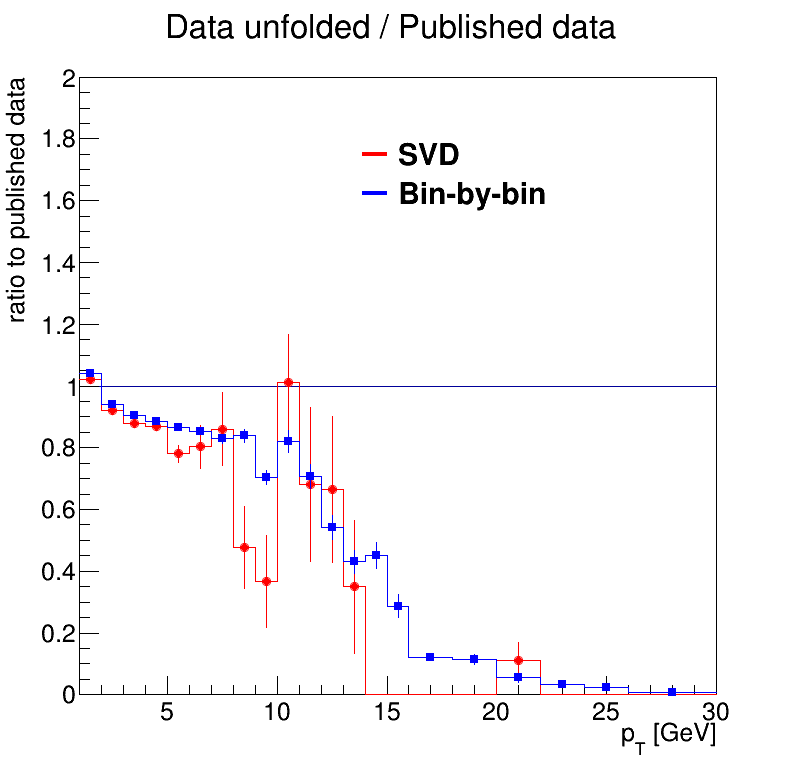

In [150]:
c= ROOT.TCanvas('c','c',800,800)


ratio_unity.Draw("histsame")
ratio_unity.SetTitle('; p_{T} [GeV]; ratio to published data')
ratio_unity.SetTitle('Data unfolded / Published data')
ratio_unity.SetMaximum(2.0)
ratio_unity.SetMinimum(0.0)
ratio_data_unfolded_SVD_4_corrected.Draw('histesame')
#ratio_data_unfolded_SVD_5_corrected.Draw('histsame')
ratio_data_corrected.Draw('histesame')
#ratio_data_raw.Draw("histsame")
#ratio_data_bkgsub.Draw("histsame")
#ratio_data_unfoldedSVD4.Draw("histsame")

label = Legend("")
label.Add(ratio_data_unfolded_SVD_4_corrected,'SVD','L')
#label.Add(ratio_data_unfolded_SVD_5_corrected,'SVD k=5 + eff corr.','L')
label.Add(ratio_data_corrected,'Bin-by-bin','L')
label.Draw(.45,.85)

c.Draw()
#c.SaveAs('Comparison_Unfolded_tracking_pPb_its_4Layers_all_new_corSVD4_13b.png')
